# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 44026 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=1)


  0% (    1 of 44026) |            | Elapsed Time: 0:00:04 ETA:  2 days, 1:40:59

  0% (  103 of 44026) |                    | Elapsed Time: 0:00:05 ETA:  0:07:08

  0% (  194 of 44026) |                    | Elapsed Time: 0:00:06 ETA:  0:07:32

  0% (  291 of 44026) |                    | Elapsed Time: 0:00:07 ETA:  0:07:31

  0% (  381 of 44026) |                    | Elapsed Time: 0:00:08 ETA:  0:07:37

  1% (  474 of 44026) |                    | Elapsed Time: 0:00:09 ETA:  0:07:38

  1% (  551 of 44026) |                    | Elapsed Time: 0:00:10 ETA:  0:07:45

  1% (  633 of 44026) |                    | Elapsed Time: 0:00:11 ETA:  0:07:53

  1% (  718 of 44026) |                    | Elapsed Time: 0:00:12 ETA:  0:07:56

  1% (  780 of 44026) |                    | Elapsed Time: 0:00:13 ETA:  0:08:14

  1% (  867 of 44026) |                    | Elapsed Time: 0:00:14 ETA:  0:08:23

  2% (  955 of 44026) |                    | Elapsed Time: 0:00:15 ETA:  0:08:24

  2% ( 1044 of 44026) |                    | Elapsed Time: 0:00:16 ETA:  0:08:28

  2% ( 1101 of 44026) |                    | Elapsed Time: 0:00:16 ETA:  0:08:29

  2% ( 1189 of 44026) |                    | Elapsed Time: 0:00:17 ETA:  0:08:32

  2% ( 1274 of 44026) |                    | Elapsed Time: 0:00:18 ETA:  0:08:31

  3% ( 1361 of 44026) |                    | Elapsed Time: 0:00:19 ETA:  0:08:26

  3% ( 1452 of 44026) |                    | Elapsed Time: 0:00:20 ETA:  0:08:21

  3% ( 1538 of 44026) |                    | Elapsed Time: 0:00:21 ETA:  0:08:03

  3% ( 1606 of 44026) |                    | Elapsed Time: 0:00:22 ETA:  0:08:15

  3% ( 1651 of 44026) |                    | Elapsed Time: 0:00:23 ETA:  0:08:22

  3% ( 1731 of 44026) |                    | Elapsed Time: 0:00:24 ETA:  0:08:28

  4% ( 1810 of 44026) |                    | Elapsed Time: 0:00:25 ETA:  0:08:33

  4% ( 1898 of 44026) |                    | Elapsed Time: 0:00:26 ETA:  0:08:32

  4% ( 1966 of 44026) |                    | Elapsed Time: 0:00:27 ETA:  0:08:44

  4% ( 2036 of 44026) |                    | Elapsed Time: 0:00:28 ETA:  0:08:57

  4% ( 2113 of 44026) |                    | Elapsed Time: 0:00:29 ETA:  0:09:08

  5% ( 2202 of 44026) |#                   | Elapsed Time: 0:00:30 ETA:  0:09:08

  5% ( 2285 of 44026) |#                   | Elapsed Time: 0:00:31 ETA:  0:09:00

  5% ( 2369 of 44026) |#                   | Elapsed Time: 0:00:32 ETA:  0:08:55

  5% ( 2462 of 44026) |#                   | Elapsed Time: 0:00:33 ETA:  0:08:42

  5% ( 2549 of 44026) |#                   | Elapsed Time: 0:00:34 ETA:  0:08:41

  5% ( 2636 of 44026) |#                   | Elapsed Time: 0:00:35 ETA:  0:08:24

  6% ( 2726 of 44026) |#                   | Elapsed Time: 0:00:36 ETA:  0:08:07

  6% ( 2752 of 44026) |#                   | Elapsed Time: 0:00:36 ETA:  0:08:00

  6% ( 2840 of 44026) |#                   | Elapsed Time: 0:00:37 ETA:  0:07:49

  6% ( 2898 of 44026) |#                   | Elapsed Time: 0:00:38 ETA:  0:08:09

  6% ( 2988 of 44026) |#                   | Elapsed Time: 0:00:39 ETA:  0:08:02

  6% ( 3078 of 44026) |#                   | Elapsed Time: 0:00:40 ETA:  0:07:57

  7% ( 3167 of 44026) |#                   | Elapsed Time: 0:00:41 ETA:  0:07:59

  7% ( 3258 of 44026) |#                   | Elapsed Time: 0:00:42 ETA:  0:07:56

  7% ( 3302 of 44026) |#                   | Elapsed Time: 0:00:43 ETA:  0:07:53

  7% ( 3386 of 44026) |#                   | Elapsed Time: 0:00:44 ETA:  0:07:57

  7% ( 3481 of 44026) |#                   | Elapsed Time: 0:00:45 ETA:  0:07:49

  8% ( 3574 of 44026) |#                   | Elapsed Time: 0:00:46 ETA:  0:07:44

  8% ( 3677 of 44026) |#                   | Elapsed Time: 0:00:47 ETA:  0:07:14

  8% ( 3761 of 44026) |#                   | Elapsed Time: 0:00:48 ETA:  0:07:17

  8% ( 3818 of 44026) |#                   | Elapsed Time: 0:00:49 ETA:  0:07:37

  8% ( 3853 of 44026) |#                   | Elapsed Time: 0:00:50 ETA:  0:07:52

  8% ( 3917 of 44026) |#                   | Elapsed Time: 0:00:51 ETA:  0:08:12

  9% ( 3981 of 44026) |#                   | Elapsed Time: 0:00:52 ETA:  0:08:31

  9% ( 4040 of 44026) |#                   | Elapsed Time: 0:00:53 ETA:  0:08:52

  9% ( 4097 of 44026) |#                   | Elapsed Time: 0:00:54 ETA:  0:09:26

  9% ( 4168 of 44026) |#                   | Elapsed Time: 0:00:55 ETA:  0:09:49

  9% ( 4250 of 44026) |#                   | Elapsed Time: 0:00:56 ETA:  0:10:11

  9% ( 4322 of 44026) |#                   | Elapsed Time: 0:00:57 ETA:  0:10:24

 10% ( 4403 of 44026) |##                  | Elapsed Time: 0:00:58 ETA:  0:09:53

 10% ( 4495 of 44026) |##                  | Elapsed Time: 0:00:59 ETA:  0:09:21

 10% ( 4581 of 44026) |##                  | Elapsed Time: 0:01:00 ETA:  0:08:59

 10% ( 4656 of 44026) |##                  | Elapsed Time: 0:01:01 ETA:  0:08:48

 10% ( 4725 of 44026) |##                  | Elapsed Time: 0:01:02 ETA:  0:08:38

 10% ( 4821 of 44026) |##                  | Elapsed Time: 0:01:03 ETA:  0:08:06

 11% ( 4920 of 44026) |##                  | Elapsed Time: 0:01:04 ETA:  0:07:44

 11% ( 4953 of 44026) |##                  | Elapsed Time: 0:01:04 ETA:  0:07:41

 11% ( 5045 of 44026) |##                  | Elapsed Time: 0:01:05 ETA:  0:07:25

 11% ( 5141 of 44026) |##                  | Elapsed Time: 0:01:06 ETA:  0:07:15

 11% ( 5236 of 44026) |##                  | Elapsed Time: 0:01:07 ETA:  0:07:12

 12% ( 5330 of 44026) |##                  | Elapsed Time: 0:01:08 ETA:  0:07:06

 12% ( 5378 of 44026) |##                  | Elapsed Time: 0:01:09 ETA:  0:07:23

 12% ( 5464 of 44026) |##                  | Elapsed Time: 0:01:10 ETA:  0:07:10

 12% ( 5504 of 44026) |##                  | Elapsed Time: 0:01:10 ETA:  0:07:13

 12% ( 5592 of 44026) |##                  | Elapsed Time: 0:01:11 ETA:  0:07:20

 12% ( 5686 of 44026) |##                  | Elapsed Time: 0:01:13 ETA:  0:07:15

 13% ( 5781 of 44026) |##                  | Elapsed Time: 0:01:14 ETA:  0:07:12

 13% ( 5874 of 44026) |##                  | Elapsed Time: 0:01:15 ETA:  0:07:13

 13% ( 5969 of 44026) |##                  | Elapsed Time: 0:01:16 ETA:  0:07:12

 13% ( 6054 of 44026) |##                  | Elapsed Time: 0:01:16 ETA:  0:07:11

 13% ( 6146 of 44026) |##                  | Elapsed Time: 0:01:17 ETA:  0:06:41

 14% ( 6246 of 44026) |##                  | Elapsed Time: 0:01:18 ETA:  0:06:32

 14% ( 6339 of 44026) |##                  | Elapsed Time: 0:01:19 ETA:  0:06:32

 14% ( 6435 of 44026) |##                  | Elapsed Time: 0:01:20 ETA:  0:06:27

 14% ( 6530 of 44026) |##                  | Elapsed Time: 0:01:21 ETA:  0:06:26

 15% ( 6604 of 44026) |###                 | Elapsed Time: 0:01:22 ETA:  0:06:26

 15% ( 6692 of 44026) |###                 | Elapsed Time: 0:01:23 ETA:  0:06:28

 15% ( 6780 of 44026) |###                 | Elapsed Time: 0:01:24 ETA:  0:06:31

 15% ( 6871 of 44026) |###                 | Elapsed Time: 0:01:25 ETA:  0:06:32

 15% ( 6964 of 44026) |###                 | Elapsed Time: 0:01:26 ETA:  0:06:30

 16% ( 7055 of 44026) |###                 | Elapsed Time: 0:01:27 ETA:  0:06:34

 16% ( 7155 of 44026) |###                 | Elapsed Time: 0:01:28 ETA:  0:06:35

 16% ( 7249 of 44026) |###                 | Elapsed Time: 0:01:29 ETA:  0:06:34

 16% ( 7348 of 44026) |###                 | Elapsed Time: 0:01:30 ETA:  0:06:28

 16% ( 7432 of 44026) |###                 | Elapsed Time: 0:01:31 ETA:  0:06:30

 17% ( 7529 of 44026) |###                 | Elapsed Time: 0:01:32 ETA:  0:06:23

 17% ( 7615 of 44026) |###                 | Elapsed Time: 0:01:33 ETA:  0:06:25

 17% ( 7705 of 44026) |###                 | Elapsed Time: 0:01:34 ETA:  0:06:26

 17% ( 7798 of 44026) |###                 | Elapsed Time: 0:01:35 ETA:  0:06:23

 17% ( 7895 of 44026) |###                 | Elapsed Time: 0:01:36 ETA:  0:06:20

 18% ( 7985 of 44026) |###                 | Elapsed Time: 0:01:37 ETA:  0:06:21

 18% ( 8075 of 44026) |###                 | Elapsed Time: 0:01:38 ETA:  0:06:22

 18% ( 8174 of 44026) |###                 | Elapsed Time: 0:01:39 ETA:  0:06:21

 18% ( 8255 of 44026) |###                 | Elapsed Time: 0:01:40 ETA:  0:06:12

 18% ( 8350 of 44026) |###                 | Elapsed Time: 0:01:41 ETA:  0:06:12

 19% ( 8447 of 44026) |###                 | Elapsed Time: 0:01:42 ETA:  0:06:04

 19% ( 8545 of 44026) |###                 | Elapsed Time: 0:01:43 ETA:  0:05:59

 19% ( 8643 of 44026) |###                 | Elapsed Time: 0:01:44 ETA:  0:05:55

 19% ( 8747 of 44026) |###                 | Elapsed Time: 0:01:45 ETA:  0:05:51

 20% ( 8806 of 44026) |####                | Elapsed Time: 0:01:46 ETA:  0:06:13

 20% ( 8901 of 44026) |####                | Elapsed Time: 0:01:47 ETA:  0:06:15

 20% ( 9002 of 44026) |####                | Elapsed Time: 0:01:48 ETA:  0:06:12

 20% ( 9100 of 44026) |####                | Elapsed Time: 0:01:49 ETA:  0:06:10

 20% ( 9200 of 44026) |####                | Elapsed Time: 0:01:50 ETA:  0:06:07

 21% ( 9300 of 44026) |####                | Elapsed Time: 0:01:51 ETA:  0:06:05

 21% ( 9356 of 44026) |####                | Elapsed Time: 0:01:52 ETA:  0:06:05

 21% ( 9453 of 44026) |####                | Elapsed Time: 0:01:53 ETA:  0:06:08

 21% ( 9547 of 44026) |####                | Elapsed Time: 0:01:54 ETA:  0:05:37

 21% ( 9640 of 44026) |####                | Elapsed Time: 0:01:55 ETA:  0:05:38

 22% ( 9738 of 44026) |####                | Elapsed Time: 0:01:56 ETA:  0:05:35

 22% ( 9832 of 44026) |####                | Elapsed Time: 0:01:57 ETA:  0:05:39

 22% ( 9906 of 44026) |####                | Elapsed Time: 0:01:58 ETA:  0:05:41

 22% ( 9995 of 44026) |####                | Elapsed Time: 0:01:59 ETA:  0:05:46

 22% (10087 of 44026) |####                | Elapsed Time: 0:02:00 ETA:  0:05:50

 23% (10186 of 44026) |####                | Elapsed Time: 0:02:01 ETA:  0:05:48

 23% (10287 of 44026) |####                | Elapsed Time: 0:02:02 ETA:  0:05:45

 23% (10382 of 44026) |####                | Elapsed Time: 0:02:03 ETA:  0:05:43

 23% (10457 of 44026) |####                | Elapsed Time: 0:02:04 ETA:  0:05:43

 23% (10556 of 44026) |####                | Elapsed Time: 0:02:05 ETA:  0:05:41

 24% (10629 of 44026) |####                | Elapsed Time: 0:02:06 ETA:  0:05:52

 24% (10700 of 44026) |####                | Elapsed Time: 0:02:07 ETA:  0:06:04

 24% (10770 of 44026) |####                | Elapsed Time: 0:02:08 ETA:  0:06:15

 24% (10838 of 44026) |####                | Elapsed Time: 0:02:09 ETA:  0:06:30

 24% (10909 of 44026) |####                | Elapsed Time: 0:02:10 ETA:  0:06:50

 24% (10981 of 44026) |####                | Elapsed Time: 0:02:11 ETA:  0:07:11

 25% (11007 of 44026) |#####               | Elapsed Time: 0:02:11 ETA:  0:07:28

 25% (11080 of 44026) |#####               | Elapsed Time: 0:02:12 ETA:  0:07:42

 25% (11157 of 44026) |#####               | Elapsed Time: 0:02:13 ETA:  0:08:03

 25% (11232 of 44026) |#####               | Elapsed Time: 0:02:14 ETA:  0:08:00

 25% (11311 of 44026) |#####               | Elapsed Time: 0:02:15 ETA:  0:07:51

 25% (11383 of 44026) |#####               | Elapsed Time: 0:02:16 ETA:  0:07:48

 26% (11471 of 44026) |#####               | Elapsed Time: 0:02:17 ETA:  0:07:28

 26% (11557 of 44026) |#####               | Elapsed Time: 0:02:18 ETA:  0:07:06

 26% (11652 of 44026) |#####               | Elapsed Time: 0:02:19 ETA:  0:06:46

 26% (11744 of 44026) |#####               | Elapsed Time: 0:02:20 ETA:  0:06:35

 26% (11836 of 44026) |#####               | Elapsed Time: 0:02:21 ETA:  0:06:20

 27% (11928 of 44026) |#####               | Elapsed Time: 0:02:22 ETA:  0:06:09

 27% (12023 of 44026) |#####               | Elapsed Time: 0:02:23 ETA:  0:05:55

 27% (12108 of 44026) |#####               | Elapsed Time: 0:02:24 ETA:  0:05:42

 27% (12202 of 44026) |#####               | Elapsed Time: 0:02:25 ETA:  0:05:27

 27% (12299 of 44026) |#####               | Elapsed Time: 0:02:26 ETA:  0:05:21

 28% (12392 of 44026) |#####               | Elapsed Time: 0:02:27 ETA:  0:05:22

 28% (12482 of 44026) |#####               | Elapsed Time: 0:02:28 ETA:  0:05:23

 28% (12569 of 44026) |#####               | Elapsed Time: 0:02:29 ETA:  0:05:25

 28% (12658 of 44026) |#####               | Elapsed Time: 0:02:30 ETA:  0:05:25

 28% (12746 of 44026) |#####               | Elapsed Time: 0:02:31 ETA:  0:05:26

 29% (12830 of 44026) |#####               | Elapsed Time: 0:02:32 ETA:  0:05:31

 29% (12859 of 44026) |#####               | Elapsed Time: 0:02:33 ETA:  0:06:14

 29% (12941 of 44026) |#####               | Elapsed Time: 0:02:34 ETA:  0:06:22

 29% (13027 of 44026) |#####               | Elapsed Time: 0:02:35 ETA:  0:06:29

 29% (13111 of 44026) |#####               | Elapsed Time: 0:02:36 ETA:  0:06:35

 30% (13208 of 44026) |######              | Elapsed Time: 0:02:37 ETA:  0:06:47

 30% (13293 of 44026) |######              | Elapsed Time: 0:02:38 ETA:  0:06:51

 30% (13384 of 44026) |######              | Elapsed Time: 0:02:39 ETA:  0:06:47

 30% (13477 of 44026) |######              | Elapsed Time: 0:02:40 ETA:  0:06:38

 30% (13565 of 44026) |######              | Elapsed Time: 0:02:41 ETA:  0:05:51

 31% (13651 of 44026) |######              | Elapsed Time: 0:02:42 ETA:  0:05:47

 31% (13759 of 44026) |######              | Elapsed Time: 0:02:43 ETA:  0:05:37

 31% (13843 of 44026) |######              | Elapsed Time: 0:02:44 ETA:  0:05:36

 31% (13927 of 44026) |######              | Elapsed Time: 0:02:45 ETA:  0:05:36

 31% (14007 of 44026) |######              | Elapsed Time: 0:02:46 ETA:  0:05:38

 32% (14093 of 44026) |######              | Elapsed Time: 0:02:47 ETA:  0:05:41

 32% (14175 of 44026) |######              | Elapsed Time: 0:02:48 ETA:  0:05:49

 32% (14260 of 44026) |######              | Elapsed Time: 0:02:49 ETA:  0:05:50

 32% (14309 of 44026) |######              | Elapsed Time: 0:02:50 ETA:  0:05:48

 32% (14417 of 44026) |######              | Elapsed Time: 0:02:51 ETA:  0:05:34

 32% (14504 of 44026) |######              | Elapsed Time: 0:02:52 ETA:  0:05:35

 33% (14591 of 44026) |######              | Elapsed Time: 0:02:53 ETA:  0:05:32

 33% (14685 of 44026) |######              | Elapsed Time: 0:02:54 ETA:  0:05:24

 33% (14778 of 44026) |######              | Elapsed Time: 0:02:55 ETA:  0:05:15

 33% (14859 of 44026) |######              | Elapsed Time: 0:02:56 ETA:  0:05:09

 33% (14939 of 44026) |######              | Elapsed Time: 0:02:57 ETA:  0:05:09

 34% (15031 of 44026) |######              | Elapsed Time: 0:02:58 ETA:  0:05:03

 34% (15117 of 44026) |######              | Elapsed Time: 0:02:59 ETA:  0:05:05

 34% (15190 of 44026) |######              | Elapsed Time: 0:03:00 ETA:  0:05:26

 34% (15272 of 44026) |######              | Elapsed Time: 0:03:01 ETA:  0:05:28

 34% (15345 of 44026) |######              | Elapsed Time: 0:03:02 ETA:  0:05:37

 35% (15410 of 44026) |#######             | Elapsed Time: 0:03:03 ETA:  0:05:50

 35% (15488 of 44026) |#######             | Elapsed Time: 0:03:04 ETA:  0:06:01

 35% (15559 of 44026) |#######             | Elapsed Time: 0:03:05 ETA:  0:06:17

 35% (15629 of 44026) |#######             | Elapsed Time: 0:03:06 ETA:  0:06:25

 35% (15706 of 44026) |#######             | Elapsed Time: 0:03:07 ETA:  0:06:36

 35% (15710 of 44026) |#######             | Elapsed Time: 0:03:08 ETA:  0:08:27

 35% (15794 of 44026) |#######             | Elapsed Time: 0:03:09 ETA:  0:08:14

 36% (15851 of 44026) |#######             | Elapsed Time: 0:03:10 ETA:  0:08:43

 36% (15925 of 44026) |#######             | Elapsed Time: 0:03:11 ETA:  0:08:41

 36% (15960 of 44026) |#######             | Elapsed Time: 0:03:12 ETA:  0:08:42

 36% (16036 of 44026) |#######             | Elapsed Time: 0:03:13 ETA:  0:08:43

 36% (16122 of 44026) |#######             | Elapsed Time: 0:03:14 ETA:  0:08:22

 36% (16221 of 44026) |#######             | Elapsed Time: 0:03:15 ETA:  0:07:46

 37% (16323 of 44026) |#######             | Elapsed Time: 0:03:16 ETA:  0:07:19

 37% (16427 of 44026) |#######             | Elapsed Time: 0:03:17 ETA:  0:05:23

 37% (16510 of 44026) |#######             | Elapsed Time: 0:03:18 ETA:  0:05:12

 37% (16596 of 44026) |#######             | Elapsed Time: 0:03:19 ETA:  0:04:52

 37% (16667 of 44026) |#######             | Elapsed Time: 0:03:20 ETA:  0:04:52

 38% (16751 of 44026) |#######             | Elapsed Time: 0:03:21 ETA:  0:04:52

 38% (16821 of 44026) |#######             | Elapsed Time: 0:03:22 ETA:  0:04:55

 38% (16886 of 44026) |#######             | Elapsed Time: 0:03:23 ETA:  0:05:08

 38% (16958 of 44026) |#######             | Elapsed Time: 0:03:24 ETA:  0:05:27

 38% (17061 of 44026) |#######             | Elapsed Time: 0:03:25 ETA:  0:05:49

 38% (17150 of 44026) |#######             | Elapsed Time: 0:03:26 ETA:  0:05:54

 39% (17241 of 44026) |#######             | Elapsed Time: 0:03:27 ETA:  0:05:48

 39% (17256 of 44026) |#######             | Elapsed Time: 0:03:28 ETA:  0:06:40

 39% (17341 of 44026) |#######             | Elapsed Time: 0:03:29 ETA:  0:06:39

 39% (17410 of 44026) |#######             | Elapsed Time: 0:03:30 ETA:  0:06:39

 39% (17482 of 44026) |#######             | Elapsed Time: 0:03:31 ETA:  0:06:31

 39% (17573 of 44026) |#######             | Elapsed Time: 0:03:32 ETA:  0:06:09

 40% (17611 of 44026) |########            | Elapsed Time: 0:03:32 ETA:  0:06:21

 40% (17699 of 44026) |########            | Elapsed Time: 0:03:33 ETA:  0:06:09

 40% (17798 of 44026) |########            | Elapsed Time: 0:03:34 ETA:  0:05:59

 40% (17883 of 44026) |########            | Elapsed Time: 0:03:35 ETA:  0:06:03

 40% (17959 of 44026) |########            | Elapsed Time: 0:03:36 ETA:  0:05:12

 40% (18032 of 44026) |########            | Elapsed Time: 0:03:37 ETA:  0:05:20

 41% (18093 of 44026) |########            | Elapsed Time: 0:03:38 ETA:  0:05:26

 41% (18161 of 44026) |########            | Elapsed Time: 0:03:39 ETA:  0:05:38

 41% (18234 of 44026) |########            | Elapsed Time: 0:03:40 ETA:  0:05:48

 41% (18337 of 44026) |########            | Elapsed Time: 0:03:41 ETA:  0:05:34

 41% (18436 of 44026) |########            | Elapsed Time: 0:03:42 ETA:  0:05:33

 42% (18535 of 44026) |########            | Elapsed Time: 0:03:43 ETA:  0:05:20

 42% (18623 of 44026) |########            | Elapsed Time: 0:03:44 ETA:  0:05:10

 42% (18712 of 44026) |########            | Elapsed Time: 0:03:45 ETA:  0:04:55

 42% (18808 of 44026) |########            | Elapsed Time: 0:03:46 ETA:  0:04:29

 42% (18901 of 44026) |########            | Elapsed Time: 0:03:47 ETA:  0:04:10

 43% (18999 of 44026) |########            | Elapsed Time: 0:03:48 ETA:  0:04:06

 43% (19099 of 44026) |########            | Elapsed Time: 0:03:49 ETA:  0:03:50

 43% (19201 of 44026) |########            | Elapsed Time: 0:03:50 ETA:  0:03:50

 43% (19262 of 44026) |########            | Elapsed Time: 0:03:51 ETA:  0:03:50

 43% (19360 of 44026) |########            | Elapsed Time: 0:03:52 ETA:  0:03:49

 44% (19445 of 44026) |########            | Elapsed Time: 0:03:53 ETA:  0:03:49

 44% (19537 of 44026) |########            | Elapsed Time: 0:03:54 ETA:  0:03:47

 44% (19625 of 44026) |########            | Elapsed Time: 0:03:55 ETA:  0:03:51

 44% (19706 of 44026) |########            | Elapsed Time: 0:03:56 ETA:  0:03:56

 44% (19786 of 44026) |########            | Elapsed Time: 0:03:57 ETA:  0:04:06

 45% (19812 of 44026) |#########           | Elapsed Time: 0:03:57 ETA:  0:04:10

 45% (19907 of 44026) |#########           | Elapsed Time: 0:03:58 ETA:  0:04:14

 45% (19996 of 44026) |#########           | Elapsed Time: 0:03:59 ETA:  0:04:19

 45% (20080 of 44026) |#########           | Elapsed Time: 0:04:00 ETA:  0:04:28

 45% (20167 of 44026) |#########           | Elapsed Time: 0:04:01 ETA:  0:04:25

 46% (20253 of 44026) |#########           | Elapsed Time: 0:04:02 ETA:  0:04:28

 46% (20340 of 44026) |#########           | Elapsed Time: 0:04:03 ETA:  0:04:28

 46% (20363 of 44026) |#########           | Elapsed Time: 0:04:03 ETA:  0:04:23

 46% (20458 of 44026) |#########           | Elapsed Time: 0:04:04 ETA:  0:04:11

 46% (20566 of 44026) |#########           | Elapsed Time: 0:04:05 ETA:  0:03:59

 46% (20668 of 44026) |#########           | Elapsed Time: 0:04:06 ETA:  0:03:53

 47% (20758 of 44026) |#########           | Elapsed Time: 0:04:07 ETA:  0:03:51

 47% (20829 of 44026) |#########           | Elapsed Time: 0:04:08 ETA:  0:03:59

 47% (20913 of 44026) |#########           | Elapsed Time: 0:04:10 ETA:  0:03:58

 47% (20995 of 44026) |#########           | Elapsed Time: 0:04:11 ETA:  0:04:01

 47% (21077 of 44026) |#########           | Elapsed Time: 0:04:12 ETA:  0:04:05

 48% (21169 of 44026) |#########           | Elapsed Time: 0:04:13 ETA:  0:04:06

 48% (21269 of 44026) |#########           | Elapsed Time: 0:04:14 ETA:  0:04:11

 48% (21366 of 44026) |#########           | Elapsed Time: 0:04:15 ETA:  0:04:14

 48% (21463 of 44026) |#########           | Elapsed Time: 0:04:15 ETA:  0:04:00

 48% (21572 of 44026) |#########           | Elapsed Time: 0:04:16 ETA:  0:03:33

 49% (21654 of 44026) |#########           | Elapsed Time: 0:04:17 ETA:  0:03:33

 49% (21743 of 44026) |#########           | Elapsed Time: 0:04:18 ETA:  0:03:34

 49% (21841 of 44026) |#########           | Elapsed Time: 0:04:19 ETA:  0:03:24

 49% (21929 of 44026) |#########           | Elapsed Time: 0:04:20 ETA:  0:03:20

 50% (22014 of 44026) |##########          | Elapsed Time: 0:04:21 ETA:  0:03:18

 50% (22111 of 44026) |##########          | Elapsed Time: 0:04:22 ETA:  0:03:19

 50% (22194 of 44026) |##########          | Elapsed Time: 0:04:23 ETA:  0:03:25

 50% (22276 of 44026) |##########          | Elapsed Time: 0:04:24 ETA:  0:03:39

 50% (22347 of 44026) |##########          | Elapsed Time: 0:04:25 ETA:  0:04:03

 50% (22436 of 44026) |##########          | Elapsed Time: 0:04:26 ETA:  0:03:57

 51% (22512 of 44026) |##########          | Elapsed Time: 0:04:27 ETA:  0:04:05

 51% (22564 of 44026) |##########          | Elapsed Time: 0:04:28 ETA:  0:04:09

 51% (22661 of 44026) |##########          | Elapsed Time: 0:04:29 ETA:  0:04:01

 51% (22742 of 44026) |##########          | Elapsed Time: 0:04:31 ETA:  0:05:02

 51% (22827 of 44026) |##########          | Elapsed Time: 0:04:32 ETA:  0:05:11

 52% (22896 of 44026) |##########          | Elapsed Time: 0:04:33 ETA:  0:05:23

 52% (22970 of 44026) |##########          | Elapsed Time: 0:04:34 ETA:  0:05:28

 52% (23070 of 44026) |##########          | Elapsed Time: 0:04:35 ETA:  0:05:03

 52% (23114 of 44026) |##########          | Elapsed Time: 0:04:35 ETA:  0:05:06

 52% (23209 of 44026) |##########          | Elapsed Time: 0:04:36 ETA:  0:04:49

 52% (23303 of 44026) |##########          | Elapsed Time: 0:04:37 ETA:  0:04:43

 53% (23384 of 44026) |##########          | Elapsed Time: 0:04:38 ETA:  0:04:55

 53% (23473 of 44026) |##########          | Elapsed Time: 0:04:39 ETA:  0:03:53

 53% (23569 of 44026) |##########          | Elapsed Time: 0:04:40 ETA:  0:03:44

 53% (23664 of 44026) |##########          | Elapsed Time: 0:04:41 ETA:  0:03:26

 53% (23766 of 44026) |##########          | Elapsed Time: 0:04:42 ETA:  0:03:08

 54% (23867 of 44026) |##########          | Elapsed Time: 0:04:43 ETA:  0:03:06

 54% (23969 of 44026) |##########          | Elapsed Time: 0:04:44 ETA:  0:03:00

 54% (24063 of 44026) |##########          | Elapsed Time: 0:04:45 ETA:  0:03:00

 54% (24173 of 44026) |##########          | Elapsed Time: 0:04:46 ETA:  0:02:50

 55% (24215 of 44026) |###########         | Elapsed Time: 0:04:47 ETA:  0:02:38

 55% (24300 of 44026) |###########         | Elapsed Time: 0:04:48 ETA:  0:02:39

 55% (24359 of 44026) |###########         | Elapsed Time: 0:04:49 ETA:  0:03:00

 55% (24414 of 44026) |###########         | Elapsed Time: 0:04:50 ETA:  0:03:24

 55% (24485 of 44026) |###########         | Elapsed Time: 0:04:51 ETA:  0:03:44

 55% (24570 of 44026) |###########         | Elapsed Time: 0:04:52 ETA:  0:03:56

 55% (24639 of 44026) |###########         | Elapsed Time: 0:04:53 ETA:  0:04:21

 56% (24692 of 44026) |###########         | Elapsed Time: 0:04:54 ETA:  0:04:58

 56% (24765 of 44026) |###########         | Elapsed Time: 0:04:55 ETA:  0:06:04

 56% (24862 of 44026) |###########         | Elapsed Time: 0:04:56 ETA:  0:05:49

 56% (24953 of 44026) |###########         | Elapsed Time: 0:04:57 ETA:  0:05:12

 56% (25018 of 44026) |###########         | Elapsed Time: 0:04:58 ETA:  0:05:00

 56% (25085 of 44026) |###########         | Elapsed Time: 0:04:59 ETA:  0:05:03

 57% (25164 of 44026) |###########         | Elapsed Time: 0:05:00 ETA:  0:05:09

 57% (25256 of 44026) |###########         | Elapsed Time: 0:05:01 ETA:  0:04:44

 57% (25315 of 44026) |###########         | Elapsed Time: 0:05:02 ETA:  0:04:12

 57% (25404 of 44026) |###########         | Elapsed Time: 0:05:03 ETA:  0:03:47

 57% (25487 of 44026) |###########         | Elapsed Time: 0:05:04 ETA:  0:03:45

 58% (25572 of 44026) |###########         | Elapsed Time: 0:05:05 ETA:  0:03:53

 58% (25670 of 44026) |###########         | Elapsed Time: 0:05:06 ETA:  0:03:47

 58% (25779 of 44026) |###########         | Elapsed Time: 0:05:07 ETA:  0:03:15

 58% (25866 of 44026) |###########         | Elapsed Time: 0:05:08 ETA:  0:02:50

 58% (25970 of 44026) |###########         | Elapsed Time: 0:05:09 ETA:  0:02:34

 59% (26059 of 44026) |###########         | Elapsed Time: 0:05:10 ETA:  0:02:35

 59% (26145 of 44026) |###########         | Elapsed Time: 0:05:11 ETA:  0:02:37

 59% (26238 of 44026) |###########         | Elapsed Time: 0:05:12 ETA:  0:02:34

 59% (26338 of 44026) |###########         | Elapsed Time: 0:05:13 ETA:  0:02:23

 60% (26416 of 44026) |############        | Elapsed Time: 0:05:13 ETA:  0:02:16

 60% (26502 of 44026) |############        | Elapsed Time: 0:05:14 ETA:  0:02:21

 60% (26601 of 44026) |############        | Elapsed Time: 0:05:15 ETA:  0:02:26

 60% (26701 of 44026) |############        | Elapsed Time: 0:05:16 ETA:  0:02:29

 60% (26803 of 44026) |############        | Elapsed Time: 0:05:17 ETA:  0:02:29

 61% (26908 of 44026) |############        | Elapsed Time: 0:05:18 ETA:  0:02:19

 61% (26966 of 44026) |############        | Elapsed Time: 0:05:19 ETA:  0:02:11

 61% (27040 of 44026) |############        | Elapsed Time: 0:05:20 ETA:  0:02:20

 61% (27127 of 44026) |############        | Elapsed Time: 0:05:21 ETA:  0:02:27

 61% (27219 of 44026) |############        | Elapsed Time: 0:05:22 ETA:  0:02:29

 62% (27310 of 44026) |############        | Elapsed Time: 0:05:23 ETA:  0:02:25

 62% (27409 of 44026) |############        | Elapsed Time: 0:05:24 ETA:  0:02:24

 62% (27488 of 44026) |############        | Elapsed Time: 0:05:25 ETA:  0:02:36

 62% (27517 of 44026) |############        | Elapsed Time: 0:05:25 ETA:  0:02:49

 62% (27587 of 44026) |############        | Elapsed Time: 0:05:26 ETA:  0:03:14

 62% (27674 of 44026) |############        | Elapsed Time: 0:05:27 ETA:  0:03:19

 63% (27765 of 44026) |############        | Elapsed Time: 0:05:28 ETA:  0:03:05

 63% (27861 of 44026) |############        | Elapsed Time: 0:05:29 ETA:  0:02:58

 63% (27965 of 44026) |############        | Elapsed Time: 0:05:30 ETA:  0:02:48

 63% (28067 of 44026) |############        | Elapsed Time: 0:05:32 ETA:  0:02:54

 63% (28164 of 44026) |############        | Elapsed Time: 0:05:33 ETA:  0:02:39

 64% (28257 of 44026) |############        | Elapsed Time: 0:05:34 ETA:  0:02:30

 64% (28341 of 44026) |############        | Elapsed Time: 0:05:35 ETA:  0:02:19

 64% (28433 of 44026) |############        | Elapsed Time: 0:05:36 ETA:  0:02:15

 64% (28526 of 44026) |############        | Elapsed Time: 0:05:37 ETA:  0:02:13

 65% (28617 of 44026) |#############       | Elapsed Time: 0:05:38 ETA:  0:02:26

 65% (28698 of 44026) |#############       | Elapsed Time: 0:05:39 ETA:  0:02:35

 65% (28778 of 44026) |#############       | Elapsed Time: 0:05:40 ETA:  0:02:40

 65% (28863 of 44026) |#############       | Elapsed Time: 0:05:41 ETA:  0:02:48

 65% (28966 of 44026) |#############       | Elapsed Time: 0:05:42 ETA:  0:02:40

 66% (29058 of 44026) |#############       | Elapsed Time: 0:05:43 ETA:  0:02:34

 66% (29142 of 44026) |#############       | Elapsed Time: 0:05:44 ETA:  0:02:38

 66% (29168 of 44026) |#############       | Elapsed Time: 0:05:44 ETA:  0:02:40

 66% (29269 of 44026) |#############       | Elapsed Time: 0:05:45 ETA:  0:02:28

 66% (29369 of 44026) |#############       | Elapsed Time: 0:05:46 ETA:  0:02:20

 66% (29463 of 44026) |#############       | Elapsed Time: 0:05:47 ETA:  0:02:10

 67% (29558 of 44026) |#############       | Elapsed Time: 0:05:48 ETA:  0:02:00

 67% (29591 of 44026) |#############       | Elapsed Time: 0:05:50 ETA:  0:03:07

 67% (29676 of 44026) |#############       | Elapsed Time: 0:05:51 ETA:  0:03:20

 67% (29718 of 44026) |#############       | Elapsed Time: 0:05:51 ETA:  0:03:29

 67% (29801 of 44026) |#############       | Elapsed Time: 0:05:52 ETA:  0:03:29

 67% (29893 of 44026) |#############       | Elapsed Time: 0:05:53 ETA:  0:03:22

 68% (29975 of 44026) |#############       | Elapsed Time: 0:05:54 ETA:  0:03:35

 68% (30080 of 44026) |#############       | Elapsed Time: 0:05:55 ETA:  0:03:30

 68% (30186 of 44026) |#############       | Elapsed Time: 0:05:56 ETA:  0:03:20

 68% (30268 of 44026) |#############       | Elapsed Time: 0:05:57 ETA:  0:03:15

 68% (30354 of 44026) |#############       | Elapsed Time: 0:05:58 ETA:  0:02:02

 69% (30443 of 44026) |#############       | Elapsed Time: 0:05:59 ETA:  0:01:59

 69% (30529 of 44026) |#############       | Elapsed Time: 0:06:00 ETA:  0:01:58

 69% (30601 of 44026) |#############       | Elapsed Time: 0:06:01 ETA:  0:02:03

 69% (30693 of 44026) |#############       | Elapsed Time: 0:06:02 ETA:  0:02:02

 69% (30785 of 44026) |#############       | Elapsed Time: 0:06:03 ETA:  0:01:56

 70% (30819 of 44026) |##############      | Elapsed Time: 0:06:03 ETA:  0:02:07

 70% (30909 of 44026) |##############      | Elapsed Time: 0:06:04 ETA:  0:02:17

 70% (30979 of 44026) |##############      | Elapsed Time: 0:06:05 ETA:  0:02:39

 70% (31055 of 44026) |##############      | Elapsed Time: 0:06:06 ETA:  0:02:45

 70% (31162 of 44026) |##############      | Elapsed Time: 0:06:07 ETA:  0:02:31

 70% (31255 of 44026) |##############      | Elapsed Time: 0:06:08 ETA:  0:02:25

 71% (31369 of 44026) |##############      | Elapsed Time: 0:06:09 ETA:  0:02:04

 71% (31465 of 44026) |##############      | Elapsed Time: 0:06:11 ETA:  0:01:59

 71% (31552 of 44026) |##############      | Elapsed Time: 0:06:12 ETA:  0:01:58

 71% (31654 of 44026) |##############      | Elapsed Time: 0:06:13 ETA:  0:01:49

 72% (31755 of 44026) |##############      | Elapsed Time: 0:06:14 ETA:  0:01:29

 72% (31849 of 44026) |##############      | Elapsed Time: 0:06:15 ETA:  0:01:18

 72% (31919 of 44026) |##############      | Elapsed Time: 0:06:15 ETA:  0:01:30

 72% (32017 of 44026) |##############      | Elapsed Time: 0:06:16 ETA:  0:01:26

 72% (32112 of 44026) |##############      | Elapsed Time: 0:06:17 ETA:  0:01:31

 73% (32208 of 44026) |##############      | Elapsed Time: 0:06:18 ETA:  0:01:27

 73% (32310 of 44026) |##############      | Elapsed Time: 0:06:19 ETA:  0:01:23

 73% (32401 of 44026) |##############      | Elapsed Time: 0:06:20 ETA:  0:01:20

 73% (32470 of 44026) |##############      | Elapsed Time: 0:06:21 ETA:  0:01:24

 73% (32570 of 44026) |##############      | Elapsed Time: 0:06:22 ETA:  0:01:24

 74% (32661 of 44026) |##############      | Elapsed Time: 0:06:23 ETA:  0:01:24

 74% (32741 of 44026) |##############      | Elapsed Time: 0:06:24 ETA:  0:01:26

 74% (32841 of 44026) |##############      | Elapsed Time: 0:06:25 ETA:  0:01:23

 74% (32953 of 44026) |##############      | Elapsed Time: 0:06:26 ETA:  0:01:13

 75% (33020 of 44026) |###############     | Elapsed Time: 0:06:27 ETA:  0:01:10

 75% (33103 of 44026) |###############     | Elapsed Time: 0:06:28 ETA:  0:01:20

 75% (33201 of 44026) |###############     | Elapsed Time: 0:06:29 ETA:  0:01:15

 75% (33287 of 44026) |###############     | Elapsed Time: 0:06:30 ETA:  0:01:18

 75% (33380 of 44026) |###############     | Elapsed Time: 0:06:31 ETA:  0:01:21

 76% (33477 of 44026) |###############     | Elapsed Time: 0:06:32 ETA:  0:01:17

 76% (33570 of 44026) |###############     | Elapsed Time: 0:06:33 ETA:  0:01:00

 76% (33673 of 44026) |###############     | Elapsed Time: 0:06:34 ETA:  0:00:58

 76% (33776 of 44026) |###############     | Elapsed Time: 0:06:35 ETA:  0:01:03

 76% (33866 of 44026) |###############     | Elapsed Time: 0:06:36 ETA:  0:01:07

 77% (33931 of 44026) |###############     | Elapsed Time: 0:06:37 ETA:  0:01:16

 77% (34004 of 44026) |###############     | Elapsed Time: 0:06:38 ETA:  0:01:30

 77% (34121 of 44026) |###############     | Elapsed Time: 0:06:39 ETA:  0:01:19

 77% (34210 of 44026) |###############     | Elapsed Time: 0:06:40 ETA:  0:01:23

 77% (34290 of 44026) |###############     | Elapsed Time: 0:06:41 ETA:  0:01:41

 78% (34388 of 44026) |###############     | Elapsed Time: 0:06:42 ETA:  0:01:43

 78% (34486 of 44026) |###############     | Elapsed Time: 0:06:43 ETA:  0:01:45

 78% (34576 of 44026) |###############     | Elapsed Time: 0:06:44 ETA:  0:01:43

 78% (34671 of 44026) |###############     | Elapsed Time: 0:06:45 ETA:  0:01:18

 78% (34754 of 44026) |###############     | Elapsed Time: 0:06:46 ETA:  0:01:11

 79% (34834 of 44026) |###############     | Elapsed Time: 0:06:47 ETA:  0:01:25

 79% (34916 of 44026) |###############     | Elapsed Time: 0:06:48 ETA:  0:01:29

 79% (35004 of 44026) |###############     | Elapsed Time: 0:06:49 ETA:  0:01:29

 79% (35091 of 44026) |###############     | Elapsed Time: 0:06:50 ETA:  0:01:23

 79% (35181 of 44026) |###############     | Elapsed Time: 0:06:51 ETA:  0:01:27

 80% (35221 of 44026) |################    | Elapsed Time: 0:06:51 ETA:  0:01:35

 80% (35303 of 44026) |################    | Elapsed Time: 0:06:52 ETA:  0:01:40

 80% (35378 of 44026) |################    | Elapsed Time: 0:06:53 ETA:  0:01:58

 80% (35465 of 44026) |################    | Elapsed Time: 0:06:54 ETA:  0:01:54

 80% (35539 of 44026) |################    | Elapsed Time: 0:06:55 ETA:  0:01:57

 80% (35623 of 44026) |################    | Elapsed Time: 0:06:56 ETA:  0:01:54

 81% (35706 of 44026) |################    | Elapsed Time: 0:06:57 ETA:  0:01:57

 81% (35772 of 44026) |################    | Elapsed Time: 0:06:58 ETA:  0:02:00

 81% (35865 of 44026) |################    | Elapsed Time: 0:06:59 ETA:  0:01:57

 81% (35944 of 44026) |################    | Elapsed Time: 0:07:00 ETA:  0:01:59

 81% (36031 of 44026) |################    | Elapsed Time: 0:07:01 ETA:  0:01:54

 82% (36123 of 44026) |################    | Elapsed Time: 0:07:02 ETA:  0:01:41

 82% (36199 of 44026) |################    | Elapsed Time: 0:07:03 ETA:  0:01:47

 82% (36296 of 44026) |################    | Elapsed Time: 0:07:04 ETA:  0:01:31

 82% (36322 of 44026) |################    | Elapsed Time: 0:07:05 ETA:  0:01:27

 82% (36413 of 44026) |################    | Elapsed Time: 0:07:06 ETA:  0:01:21

 82% (36497 of 44026) |################    | Elapsed Time: 0:07:07 ETA:  0:01:19

 83% (36580 of 44026) |################    | Elapsed Time: 0:07:08 ETA:  0:01:25

 83% (36646 of 44026) |################    | Elapsed Time: 0:07:09 ETA:  0:01:34

 83% (36733 of 44026) |################    | Elapsed Time: 0:07:10 ETA:  0:01:32

 83% (36820 of 44026) |################    | Elapsed Time: 0:07:11 ETA:  0:01:34

 83% (36872 of 44026) |################    | Elapsed Time: 0:07:11 ETA:  0:01:25

 83% (36963 of 44026) |################    | Elapsed Time: 0:07:12 ETA:  0:01:29

 84% (37043 of 44026) |################    | Elapsed Time: 0:07:13 ETA:  0:01:33

 84% (37135 of 44026) |################    | Elapsed Time: 0:07:14 ETA:  0:01:31

 84% (37203 of 44026) |################    | Elapsed Time: 0:07:15 ETA:  0:01:42

 84% (37295 of 44026) |################    | Elapsed Time: 0:07:16 ETA:  0:01:34

 84% (37392 of 44026) |################    | Elapsed Time: 0:07:17 ETA:  0:01:12

 85% (37423 of 44026) |#################   | Elapsed Time: 0:07:18 ETA:  0:01:12

 85% (37512 of 44026) |#################   | Elapsed Time: 0:07:19 ETA:  0:01:09

 85% (37604 of 44026) |#################   | Elapsed Time: 0:07:20 ETA:  0:01:06

 85% (37644 of 44026) |#################   | Elapsed Time: 0:07:22 ETA:  0:02:45

 85% (37732 of 44026) |#################   | Elapsed Time: 0:07:23 ETA:  0:02:37

 85% (37810 of 44026) |#################   | Elapsed Time: 0:07:24 ETA:  0:02:49

 86% (37897 of 44026) |#################   | Elapsed Time: 0:07:25 ETA:  0:02:31

 86% (37973 of 44026) |#################   | Elapsed Time: 0:07:26 ETA:  0:02:36

 86% (38067 of 44026) |#################   | Elapsed Time: 0:07:27 ETA:  0:02:37

 86% (38154 of 44026) |#################   | Elapsed Time: 0:07:28 ETA:  0:02:28

 86% (38251 of 44026) |#################   | Elapsed Time: 0:07:29 ETA:  0:02:21

 87% (38323 of 44026) |#################   | Elapsed Time: 0:07:30 ETA:  0:02:37

 87% (38422 of 44026) |#################   | Elapsed Time: 0:07:31 ETA:  0:00:54

 87% (38523 of 44026) |#################   | Elapsed Time: 0:07:32 ETA:  0:00:46

 87% (38589 of 44026) |#################   | Elapsed Time: 0:07:33 ETA:  0:01:00

 87% (38683 of 44026) |#################   | Elapsed Time: 0:07:34 ETA:  0:00:54

 88% (38759 of 44026) |#################   | Elapsed Time: 0:07:35 ETA:  0:01:07

 88% (38857 of 44026) |#################   | Elapsed Time: 0:07:36 ETA:  0:00:58

 88% (38940 of 44026) |#################   | Elapsed Time: 0:07:37 ETA:  0:01:07

 88% (39036 of 44026) |#################   | Elapsed Time: 0:07:38 ETA:  0:00:49

 88% (39074 of 44026) |#################   | Elapsed Time: 0:07:38 ETA:  0:00:51

 88% (39164 of 44026) |#################   | Elapsed Time: 0:07:39 ETA:  0:00:52

 89% (39251 of 44026) |#################   | Elapsed Time: 0:07:40 ETA:  0:00:48

 89% (39346 of 44026) |#################   | Elapsed Time: 0:07:41 ETA:  0:00:27

 89% (39444 of 44026) |#################   | Elapsed Time: 0:07:42 ETA:  0:00:23

 89% (39530 of 44026) |#################   | Elapsed Time: 0:07:43 ETA:  0:00:16

 89% (39603 of 44026) |#################   | Elapsed Time: 0:07:44 ETA:  0:00:31

 90% (39624 of 44026) |##################  | Elapsed Time: 0:07:44 ETA:  0:00:31

 90% (39712 of 44026) |##################  | Elapsed Time: 0:07:45 ETA:  0:00:36

 90% (39793 of 44026) |##################  | Elapsed Time: 0:07:46 ETA:  0:00:45

 90% (39871 of 44026) |##################  | Elapsed Time: 0:07:47 ETA:  0:00:53

 90% (39968 of 44026) |##################  | Elapsed Time: 0:07:49 ETA:  0:00:45

 90% (40058 of 44026) |##################  | Elapsed Time: 0:07:50 ETA:  0:00:48

 91% (40137 of 44026) |##################  | Elapsed Time: 0:07:51 ETA:  0:01:02

 91% (40174 of 44026) |##################  | Elapsed Time: 0:07:51 ETA:  0:01:09

 91% (40259 of 44026) |##################  | Elapsed Time: 0:07:52 ETA:  0:00:57

 91% (40331 of 44026) |##################  | Elapsed Time: 0:07:53 ETA:  0:01:01

 91% (40418 of 44026) |##################  | Elapsed Time: 0:07:54 ETA:  0:01:01

 92% (40514 of 44026) |##################  | Elapsed Time: 0:07:55 ETA:  0:00:49

 92% (40580 of 44026) |##################  | Elapsed Time: 0:07:56 ETA:  0:00:57

 92% (40665 of 44026) |##################  | Elapsed Time: 0:07:57 ETA:  0:01:06

 92% (40725 of 44026) |##################  | Elapsed Time: 0:07:58 ETA:  0:01:18

 92% (40816 of 44026) |##################  | Elapsed Time: 0:07:59 ETA:  0:01:06

 92% (40906 of 44026) |##################  | Elapsed Time: 0:08:00 ETA:  0:00:55

 93% (40985 of 44026) |##################  | Elapsed Time: 0:08:01 ETA:  0:00:58

 93% (41077 of 44026) |##################  | Elapsed Time: 0:08:02 ETA:  0:00:43

 93% (41164 of 44026) |##################  | Elapsed Time: 0:08:03 ETA:  0:00:42

 93% (41275 of 44026) |##################  | Elapsed Time: 0:08:04 ETA:  0:00:27

 93% (41359 of 44026) |##################  | Elapsed Time: 0:08:05 ETA:  0:00:26

 94% (41434 of 44026) |##################  | Elapsed Time: 0:08:06 ETA:  0:00:25

 94% (41513 of 44026) |##################  | Elapsed Time: 0:08:07 ETA:  0:00:32

 94% (41595 of 44026) |##################  | Elapsed Time: 0:08:08 ETA:  0:00:37

 94% (41676 of 44026) |##################  | Elapsed Time: 0:08:09 ETA:  0:00:35

 94% (41750 of 44026) |##################  | Elapsed Time: 0:08:10 ETA:  0:00:48

 95% (41825 of 44026) |################### | Elapsed Time: 0:08:11 ETA:  0:00:54

 95% (41912 of 44026) |################### | Elapsed Time: 0:08:12 ETA:  0:00:59

 95% (41995 of 44026) |################### | Elapsed Time: 0:08:13 ETA:  0:00:57

 95% (42078 of 44026) |################### | Elapsed Time: 0:08:14 ETA:  0:00:56

 95% (42154 of 44026) |################### | Elapsed Time: 0:08:15 ETA:  0:00:57

 95% (42233 of 44026) |################### | Elapsed Time: 0:08:16 ETA:  0:00:56

 96% (42320 of 44026) |################### | Elapsed Time: 0:08:17 ETA:  0:00:51

 96% (42376 of 44026) |################### | Elapsed Time: 0:08:18 ETA:  0:00:48

 96% (42472 of 44026) |################### | Elapsed Time: 0:08:19 ETA:  0:00:31

 96% (42565 of 44026) |################### | Elapsed Time: 0:08:20 ETA:  0:00:19

 96% (42653 of 44026) |################### | Elapsed Time: 0:08:21 ETA:  0:00:18

 97% (42735 of 44026) |################### | Elapsed Time: 0:08:22 ETA:  0:00:17

 97% (42826 of 44026) |################### | Elapsed Time: 0:08:23 ETA:  0:00:11

 97% (42907 of 44026) |################### | Elapsed Time: 0:08:24 ETA:  0:00:05

 97% (42926 of 44026) |################### | Elapsed Time: 0:08:24 ETA:  0:00:00

 97% (42994 of 44026) |################### | Elapsed Time: 0:08:25 ETA:  0:00:12

 97% (43068 of 44026) |################### | Elapsed Time: 0:08:26 ETA:  0:00:19

 97% (43141 of 44026) |################### | Elapsed Time: 0:08:27 ETA:  0:00:37

 98% (43210 of 44026) |################### | Elapsed Time: 0:08:28 ETA:  0:00:56

 98% (43282 of 44026) |################### | Elapsed Time: 0:08:29 ETA:  0:01:10

 98% (43353 of 44026) |################### | Elapsed Time: 0:08:30 ETA:  0:01:18

 98% (43429 of 44026) |################### | Elapsed Time: 0:08:31 ETA:  0:01:32

 98% (43476 of 44026) |################### | Elapsed Time: 0:08:32 ETA:  0:01:33

 98% (43540 of 44026) |################### | Elapsed Time: 0:08:33 ETA:  0:01:44

 99% (43624 of 44026) |################### | Elapsed Time: 0:08:34 ETA:  0:01:28

 99% (43707 of 44026) |################### | Elapsed Time: 0:08:35 ETA:  0:01:18

 99% (43790 of 44026) |################### | Elapsed Time: 0:08:36 ETA:  0:01:07

 99% (43841 of 44026) |################### | Elapsed Time: 0:08:37 ETA:  0:01:22

 99% (43916 of 44026) |################### | Elapsed Time: 0:08:38 ETA:  0:01:18

 99% (43978 of 44026) |################### | Elapsed Time: 0:08:39 ETA:  0:01:26

100% (44026 of 44026) |####################| Elapsed Time: 0:08:39 Time: 0:08:39


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

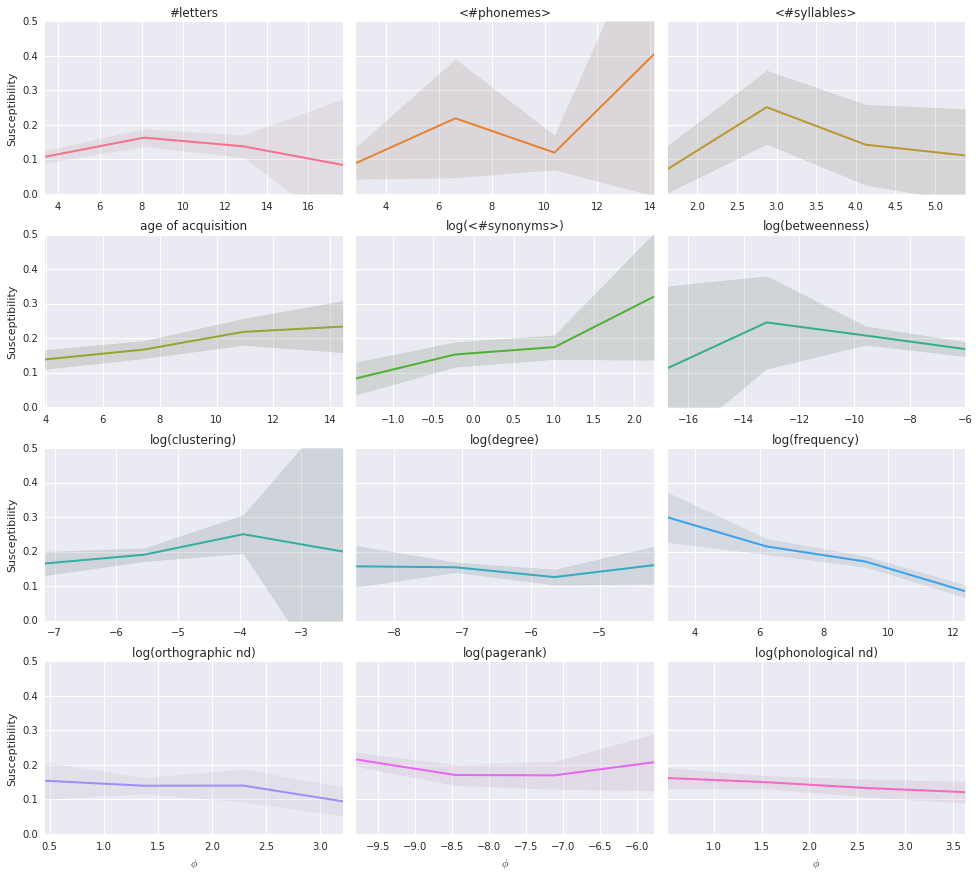

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

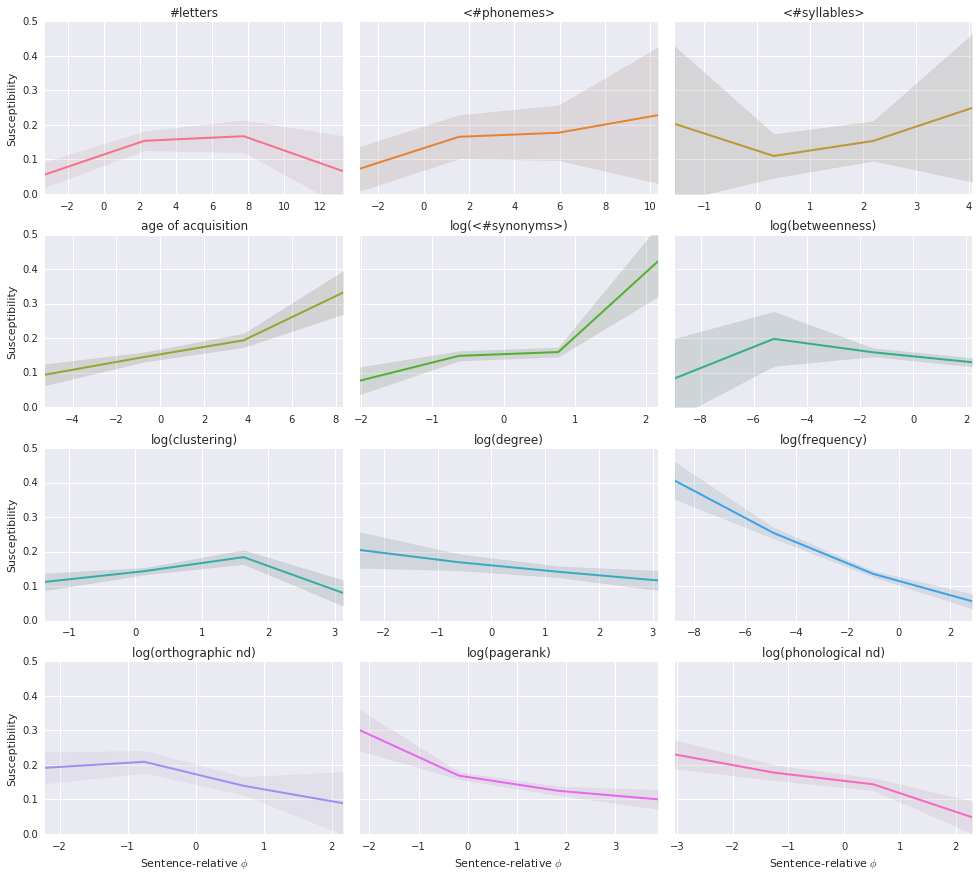

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

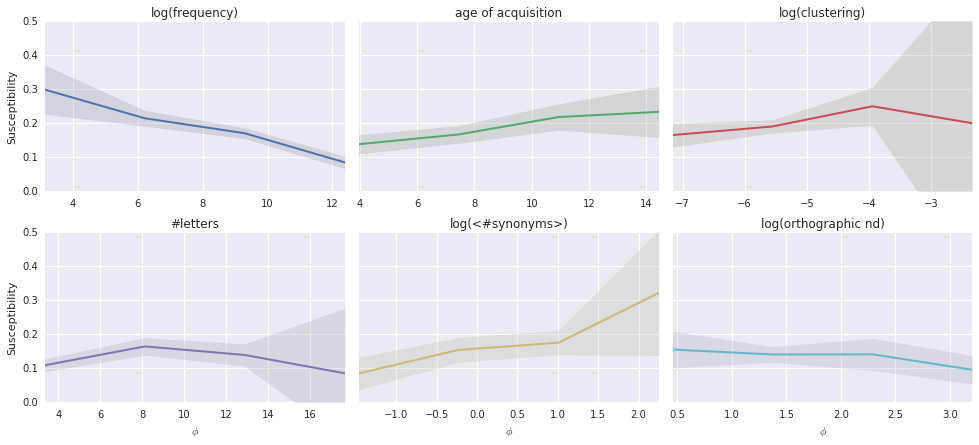

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

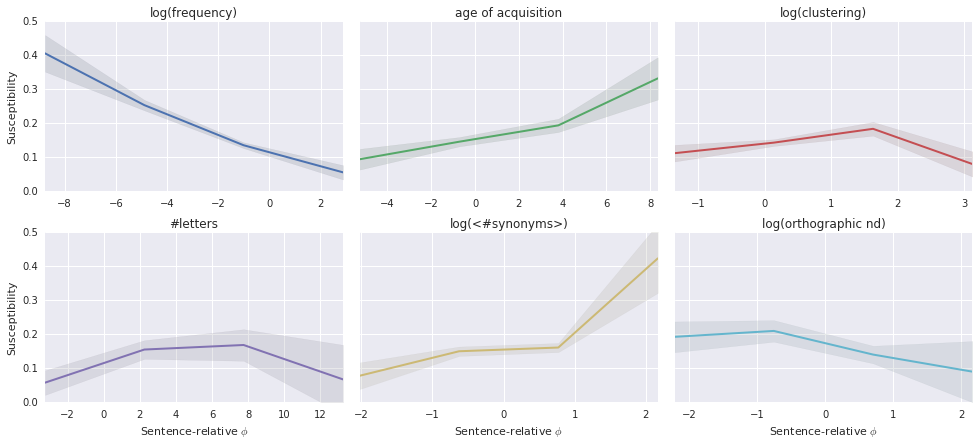

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

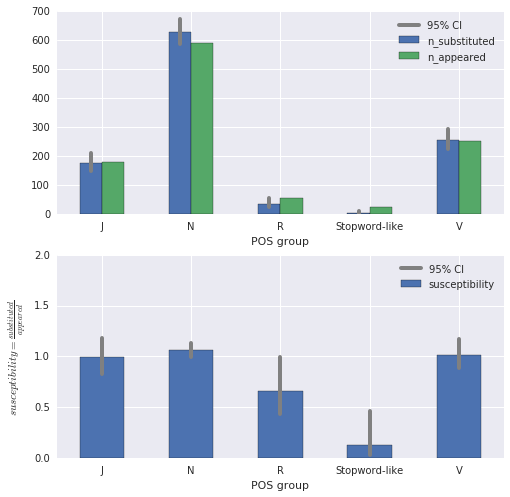

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['R', 'Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

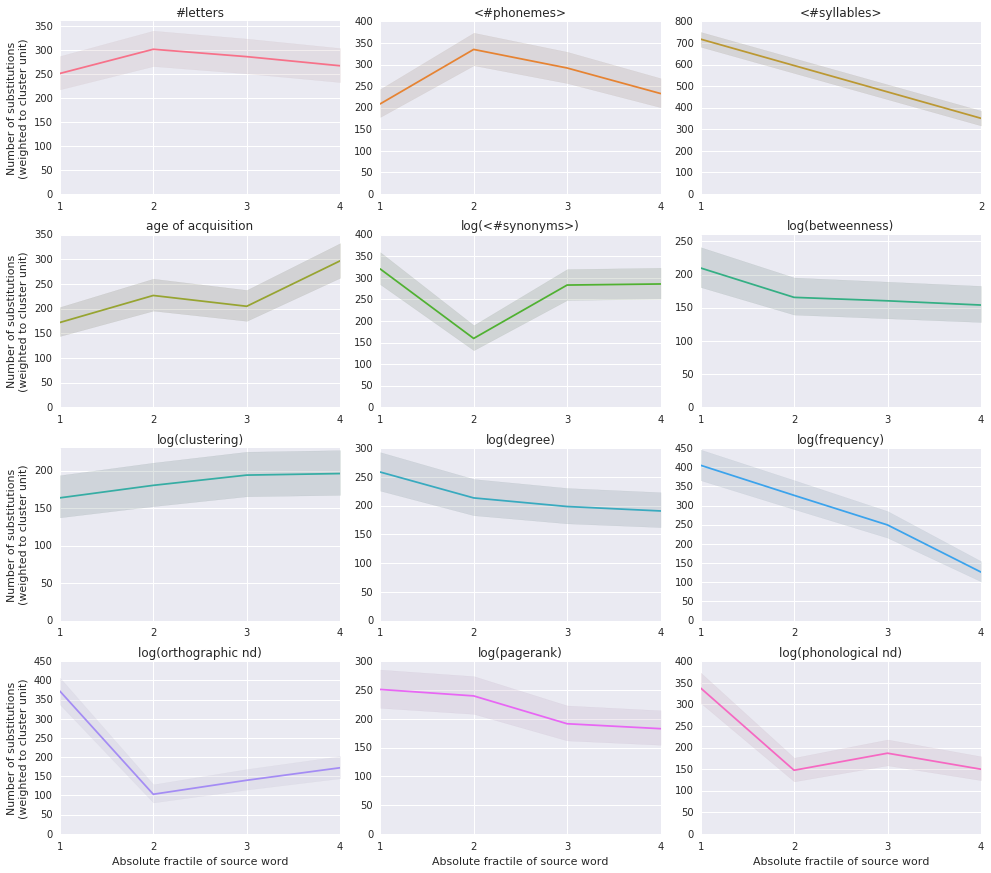

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

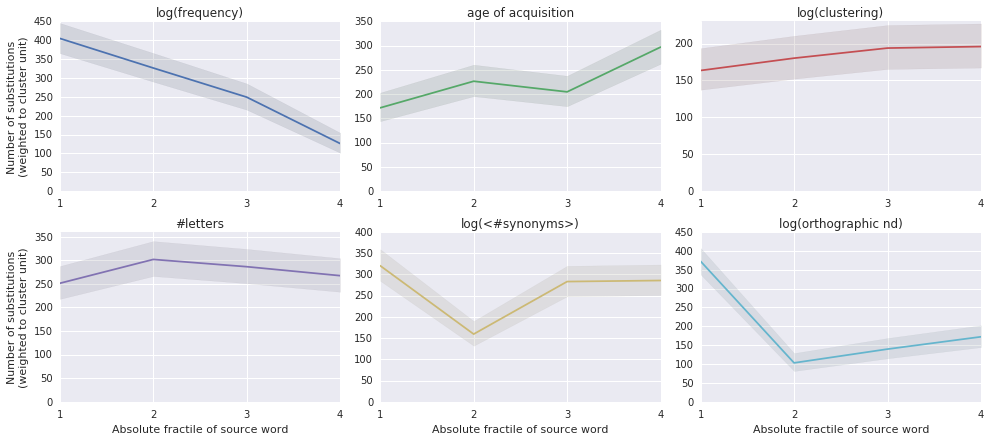

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (   12 of 44026) |                    | Elapsed Time: 0:00:01 ETA:  1:01:49

  0% (   77 of 44026) |                    | Elapsed Time: 0:00:02 ETA:  0:11:19

  0% (  143 of 44026) |                    | Elapsed Time: 0:00:03 ETA:  0:11:11

  0% (  207 of 44026) |                    | Elapsed Time: 0:00:04 ETA:  0:11:15

  0% (  272 of 44026) |                    | Elapsed Time: 0:00:05 ETA:  0:11:13

  0% (  340 of 44026) |                    | Elapsed Time: 0:00:06 ETA:  0:11:07

  0% (  412 of 44026) |                    | Elapsed Time: 0:00:07 ETA:  0:10:56

  1% (  485 of 44026) |                    | Elapsed Time: 0:00:08 ETA:  0:10:46

  1% (  551 of 44026) |                    | Elapsed Time: 0:00:08 ETA:  0:10:38

  1% (  625 of 44026) |                    | Elapsed Time: 0:00:09 ETA:  0:10:32

  1% (  701 of 44026) |                    | Elapsed Time: 0:00:10 ETA:  0:10:20

  1% (  775 of 44026) |                    | Elapsed Time: 0:00:11 ETA:  0:10:11

  1% (  851 of 44026) |                    | Elapsed Time: 0:00:12 ETA:  0:09:59

  2% (  916 of 44026) |                    | Elapsed Time: 0:00:13 ETA:  0:09:59

  2% (  989 of 44026) |                    | Elapsed Time: 0:00:14 ETA:  0:09:52

  2% ( 1065 of 44026) |                    | Elapsed Time: 0:00:15 ETA:  0:09:47

  2% ( 1101 of 44026) |                    | Elapsed Time: 0:00:16 ETA:  0:09:47

  2% ( 1170 of 44026) |                    | Elapsed Time: 0:00:17 ETA:  0:09:52

  2% ( 1250 of 44026) |                    | Elapsed Time: 0:00:18 ETA:  0:09:45

  3% ( 1335 of 44026) |                    | Elapsed Time: 0:00:19 ETA:  0:09:34

  3% ( 1425 of 44026) |                    | Elapsed Time: 0:00:20 ETA:  0:09:18

  3% ( 1495 of 44026) |                    | Elapsed Time: 0:00:21 ETA:  0:09:23

  3% ( 1562 of 44026) |                    | Elapsed Time: 0:00:22 ETA:  0:09:21

  3% ( 1629 of 44026) |                    | Elapsed Time: 0:00:23 ETA:  0:09:25

  3% ( 1651 of 44026) |                    | Elapsed Time: 0:00:23 ETA:  0:09:29

  3% ( 1717 of 44026) |                    | Elapsed Time: 0:00:24 ETA:  0:09:34

  4% ( 1783 of 44026) |                    | Elapsed Time: 0:00:25 ETA:  0:09:36

  4% ( 1851 of 44026) |                    | Elapsed Time: 0:00:26 ETA:  0:09:47

  4% ( 1915 of 44026) |                    | Elapsed Time: 0:00:27 ETA:  0:10:09

  4% ( 1998 of 44026) |                    | Elapsed Time: 0:00:28 ETA:  0:10:15

  4% ( 2077 of 44026) |                    | Elapsed Time: 0:00:29 ETA:  0:10:04

  4% ( 2160 of 44026) |                    | Elapsed Time: 0:00:30 ETA:  0:09:45

  5% ( 2202 of 44026) |#                   | Elapsed Time: 0:00:31 ETA:  0:09:34

  5% ( 2268 of 44026) |#                   | Elapsed Time: 0:00:32 ETA:  0:09:38

  5% ( 2334 of 44026) |#                   | Elapsed Time: 0:00:33 ETA:  0:09:37

  5% ( 2398 of 44026) |#                   | Elapsed Time: 0:00:34 ETA:  0:09:38

  5% ( 2462 of 44026) |#                   | Elapsed Time: 0:00:35 ETA:  0:09:42

  5% ( 2529 of 44026) |#                   | Elapsed Time: 0:00:36 ETA:  0:09:38

  5% ( 2601 of 44026) |#                   | Elapsed Time: 0:00:37 ETA:  0:09:48

  6% ( 2671 of 44026) |#                   | Elapsed Time: 0:00:38 ETA:  0:09:56

  6% ( 2752 of 44026) |#                   | Elapsed Time: 0:00:39 ETA:  0:10:17

  6% ( 2823 of 44026) |#                   | Elapsed Time: 0:00:40 ETA:  0:10:09

  6% ( 2896 of 44026) |#                   | Elapsed Time: 0:00:41 ETA:  0:10:00

  6% ( 2970 of 44026) |#                   | Elapsed Time: 0:00:42 ETA:  0:09:48

  6% ( 3044 of 44026) |#                   | Elapsed Time: 0:00:43 ETA:  0:09:35

  7% ( 3117 of 44026) |#                   | Elapsed Time: 0:00:44 ETA:  0:09:27

  7% ( 3187 of 44026) |#                   | Elapsed Time: 0:00:45 ETA:  0:09:28

  7% ( 3257 of 44026) |#                   | Elapsed Time: 0:00:46 ETA:  0:09:27

  7% ( 3302 of 44026) |#                   | Elapsed Time: 0:00:47 ETA:  0:09:26

  7% ( 3369 of 44026) |#                   | Elapsed Time: 0:00:48 ETA:  0:09:29

  7% ( 3440 of 44026) |#                   | Elapsed Time: 0:00:49 ETA:  0:09:29

  7% ( 3518 of 44026) |#                   | Elapsed Time: 0:00:50 ETA:  0:09:23

  8% ( 3595 of 44026) |#                   | Elapsed Time: 0:00:51 ETA:  0:09:19

  8% ( 3671 of 44026) |#                   | Elapsed Time: 0:00:52 ETA:  0:09:17

  8% ( 3746 of 44026) |#                   | Elapsed Time: 0:00:53 ETA:  0:09:14

  8% ( 3820 of 44026) |#                   | Elapsed Time: 0:00:54 ETA:  0:09:10

  8% ( 3853 of 44026) |#                   | Elapsed Time: 0:00:54 ETA:  0:09:09

  8% ( 3929 of 44026) |#                   | Elapsed Time: 0:00:55 ETA:  0:09:04

  9% ( 4000 of 44026) |#                   | Elapsed Time: 0:00:56 ETA:  0:09:00

  9% ( 4079 of 44026) |#                   | Elapsed Time: 0:00:57 ETA:  0:08:51

  9% ( 4154 of 44026) |#                   | Elapsed Time: 0:00:58 ETA:  0:08:53

  9% ( 4225 of 44026) |#                   | Elapsed Time: 0:00:59 ETA:  0:08:58

  9% ( 4295 of 44026) |#                   | Elapsed Time: 0:01:00 ETA:  0:09:02

  9% ( 4373 of 44026) |#                   | Elapsed Time: 0:01:01 ETA:  0:08:58

 10% ( 4403 of 44026) |##                  | Elapsed Time: 0:01:02 ETA:  0:08:51

 10% ( 4482 of 44026) |##                  | Elapsed Time: 0:01:03 ETA:  0:08:43

 10% ( 4555 of 44026) |##                  | Elapsed Time: 0:01:04 ETA:  0:08:45

 10% ( 4629 of 44026) |##                  | Elapsed Time: 0:01:05 ETA:  0:08:41

 10% ( 4715 of 44026) |##                  | Elapsed Time: 0:01:06 ETA:  0:08:33

 10% ( 4792 of 44026) |##                  | Elapsed Time: 0:01:07 ETA:  0:08:30

 11% ( 4876 of 44026) |##                  | Elapsed Time: 0:01:08 ETA:  0:08:18

 11% ( 4953 of 44026) |##                  | Elapsed Time: 0:01:09 ETA:  0:08:13

 11% ( 5029 of 44026) |##                  | Elapsed Time: 0:01:10 ETA:  0:08:18

 11% ( 5104 of 44026) |##                  | Elapsed Time: 0:01:11 ETA:  0:08:21

 11% ( 5175 of 44026) |##                  | Elapsed Time: 0:01:12 ETA:  0:08:22

 11% ( 5247 of 44026) |##                  | Elapsed Time: 0:01:13 ETA:  0:08:23

 12% ( 5318 of 44026) |##                  | Elapsed Time: 0:01:14 ETA:  0:08:36

 12% ( 5389 of 44026) |##                  | Elapsed Time: 0:01:15 ETA:  0:08:41

 12% ( 5463 of 44026) |##                  | Elapsed Time: 0:01:16 ETA:  0:08:49

 12% ( 5504 of 44026) |##                  | Elapsed Time: 0:01:17 ETA:  0:08:56

 12% ( 5577 of 44026) |##                  | Elapsed Time: 0:01:18 ETA:  0:08:55

 12% ( 5650 of 44026) |##                  | Elapsed Time: 0:01:19 ETA:  0:08:57

 12% ( 5718 of 44026) |##                  | Elapsed Time: 0:01:20 ETA:  0:09:03

 13% ( 5787 of 44026) |##                  | Elapsed Time: 0:01:21 ETA:  0:09:04

 13% ( 5861 of 44026) |##                  | Elapsed Time: 0:01:22 ETA:  0:09:01

 13% ( 5934 of 44026) |##                  | Elapsed Time: 0:01:23 ETA:  0:08:59

 13% ( 6009 of 44026) |##                  | Elapsed Time: 0:01:24 ETA:  0:08:53

 13% ( 6054 of 44026) |##                  | Elapsed Time: 0:01:24 ETA:  0:08:52

 13% ( 6129 of 44026) |##                  | Elapsed Time: 0:01:25 ETA:  0:08:43

 14% ( 6199 of 44026) |##                  | Elapsed Time: 0:01:26 ETA:  0:08:45

 14% ( 6270 of 44026) |##                  | Elapsed Time: 0:01:27 ETA:  0:08:46

 14% ( 6345 of 44026) |##                  | Elapsed Time: 0:01:28 ETA:  0:08:39

 14% ( 6417 of 44026) |##                  | Elapsed Time: 0:01:29 ETA:  0:08:34

 14% ( 6494 of 44026) |##                  | Elapsed Time: 0:01:30 ETA:  0:08:30

 14% ( 6570 of 44026) |##                  | Elapsed Time: 0:01:31 ETA:  0:08:25

 15% ( 6604 of 44026) |###                 | Elapsed Time: 0:01:32 ETA:  0:08:28

 15% ( 6681 of 44026) |###                 | Elapsed Time: 0:01:33 ETA:  0:08:26

 15% ( 6755 of 44026) |###                 | Elapsed Time: 0:01:34 ETA:  0:08:26

 15% ( 6830 of 44026) |###                 | Elapsed Time: 0:01:35 ETA:  0:08:20

 15% ( 6916 of 44026) |###                 | Elapsed Time: 0:01:36 ETA:  0:08:05

 15% ( 6998 of 44026) |###                 | Elapsed Time: 0:01:37 ETA:  0:07:58

 16% ( 7083 of 44026) |###                 | Elapsed Time: 0:01:38 ETA:  0:07:46

 16% ( 7155 of 44026) |###                 | Elapsed Time: 0:01:39 ETA:  0:07:37

 16% ( 7236 of 44026) |###                 | Elapsed Time: 0:01:40 ETA:  0:07:32

 16% ( 7312 of 44026) |###                 | Elapsed Time: 0:01:41 ETA:  0:07:30

 16% ( 7391 of 44026) |###                 | Elapsed Time: 0:01:42 ETA:  0:07:28

 16% ( 7474 of 44026) |###                 | Elapsed Time: 0:01:43 ETA:  0:07:20

 17% ( 7561 of 44026) |###                 | Elapsed Time: 0:01:44 ETA:  0:07:10

 17% ( 7650 of 44026) |###                 | Elapsed Time: 0:01:45 ETA:  0:07:07

 17% ( 7705 of 44026) |###                 | Elapsed Time: 0:01:45 ETA:  0:07:05

 17% ( 7784 of 44026) |###                 | Elapsed Time: 0:01:46 ETA:  0:07:09

 17% ( 7863 of 44026) |###                 | Elapsed Time: 0:01:47 ETA:  0:07:14

 18% ( 7944 of 44026) |###                 | Elapsed Time: 0:01:48 ETA:  0:07:13

 18% ( 8023 of 44026) |###                 | Elapsed Time: 0:01:49 ETA:  0:07:10

 18% ( 8105 of 44026) |###                 | Elapsed Time: 0:01:50 ETA:  0:07:06

 18% ( 8188 of 44026) |###                 | Elapsed Time: 0:01:51 ETA:  0:07:05

 18% ( 8255 of 44026) |###                 | Elapsed Time: 0:01:52 ETA:  0:07:09

 18% ( 8337 of 44026) |###                 | Elapsed Time: 0:01:53 ETA:  0:07:13

 19% ( 8419 of 44026) |###                 | Elapsed Time: 0:01:54 ETA:  0:07:14

 19% ( 8502 of 44026) |###                 | Elapsed Time: 0:01:55 ETA:  0:07:09

 19% ( 8586 of 44026) |###                 | Elapsed Time: 0:01:56 ETA:  0:07:04

 19% ( 8670 of 44026) |###                 | Elapsed Time: 0:01:57 ETA:  0:07:01

 19% ( 8753 of 44026) |###                 | Elapsed Time: 0:01:58 ETA:  0:06:57

 20% ( 8806 of 44026) |####                | Elapsed Time: 0:01:59 ETA:  0:06:57

 20% ( 8880 of 44026) |####                | Elapsed Time: 0:02:00 ETA:  0:07:03

 20% ( 8955 of 44026) |####                | Elapsed Time: 0:02:01 ETA:  0:07:06

 20% ( 9029 of 44026) |####                | Elapsed Time: 0:02:02 ETA:  0:07:11

 20% ( 9109 of 44026) |####                | Elapsed Time: 0:02:03 ETA:  0:07:12

 20% ( 9191 of 44026) |####                | Elapsed Time: 0:02:04 ETA:  0:07:12

 21% ( 9270 of 44026) |####                | Elapsed Time: 0:02:05 ETA:  0:07:15

 21% ( 9356 of 44026) |####                | Elapsed Time: 0:02:06 ETA:  0:07:17

 21% ( 9431 of 44026) |####                | Elapsed Time: 0:02:07 ETA:  0:07:21

 21% ( 9516 of 44026) |####                | Elapsed Time: 0:02:08 ETA:  0:07:10

 21% ( 9599 of 44026) |####                | Elapsed Time: 0:02:09 ETA:  0:07:02

 21% ( 9679 of 44026) |####                | Elapsed Time: 0:02:10 ETA:  0:06:57

 22% ( 9758 of 44026) |####                | Elapsed Time: 0:02:11 ETA:  0:06:56

 22% ( 9835 of 44026) |####                | Elapsed Time: 0:02:12 ETA:  0:06:59

 22% ( 9906 of 44026) |####                | Elapsed Time: 0:02:13 ETA:  0:07:01

 22% ( 9980 of 44026) |####                | Elapsed Time: 0:02:14 ETA:  0:07:10

 22% (10052 of 44026) |####                | Elapsed Time: 0:02:15 ETA:  0:07:15

 22% (10121 of 44026) |####                | Elapsed Time: 0:02:16 ETA:  0:07:18

 23% (10194 of 44026) |####                | Elapsed Time: 0:02:17 ETA:  0:07:27

 23% (10254 of 44026) |####                | Elapsed Time: 0:02:18 ETA:  0:07:46

 23% (10315 of 44026) |####                | Elapsed Time: 0:02:19 ETA:  0:08:04

 23% (10372 of 44026) |####                | Elapsed Time: 0:02:20 ETA:  0:08:25

 23% (10415 of 44026) |####                | Elapsed Time: 0:02:23 ETA:  0:11:07

 23% (10457 of 44026) |####                | Elapsed Time: 0:02:23 ETA:  0:11:20

 23% (10533 of 44026) |####                | Elapsed Time: 0:02:24 ETA:  0:11:16

 24% (10607 of 44026) |####                | Elapsed Time: 0:02:25 ETA:  0:11:12

 24% (10662 of 44026) |####                | Elapsed Time: 0:02:26 ETA:  0:11:33

 24% (10727 of 44026) |####                | Elapsed Time: 0:02:27 ETA:  0:11:44

 24% (10796 of 44026) |####                | Elapsed Time: 0:02:28 ETA:  0:11:29

 24% (10861 of 44026) |####                | Elapsed Time: 0:02:29 ETA:  0:11:21

 24% (10931 of 44026) |####                | Elapsed Time: 0:02:30 ETA:  0:11:02

 24% (10994 of 44026) |####                | Elapsed Time: 0:02:31 ETA:  0:08:26

 25% (11007 of 44026) |#####               | Elapsed Time: 0:02:32 ETA:  0:08:31

 25% (11076 of 44026) |#####               | Elapsed Time: 0:02:33 ETA:  0:08:39

 25% (11159 of 44026) |#####               | Elapsed Time: 0:02:34 ETA:  0:08:26

 25% (11237 of 44026) |#####               | Elapsed Time: 0:02:35 ETA:  0:07:59

 25% (11312 of 44026) |#####               | Elapsed Time: 0:02:36 ETA:  0:07:47

 25% (11378 of 44026) |#####               | Elapsed Time: 0:02:37 ETA:  0:07:49

 25% (11442 of 44026) |#####               | Elapsed Time: 0:02:38 ETA:  0:07:50

 26% (11498 of 44026) |#####               | Elapsed Time: 0:02:39 ETA:  0:08:05

 26% (11557 of 44026) |#####               | Elapsed Time: 0:02:40 ETA:  0:08:04

 26% (11619 of 44026) |#####               | Elapsed Time: 0:02:41 ETA:  0:08:07

 26% (11683 of 44026) |#####               | Elapsed Time: 0:02:42 ETA:  0:08:11

 26% (11751 of 44026) |#####               | Elapsed Time: 0:02:43 ETA:  0:08:27

 26% (11830 of 44026) |#####               | Elapsed Time: 0:02:44 ETA:  0:08:25

 27% (11904 of 44026) |#####               | Elapsed Time: 0:02:45 ETA:  0:08:25

 27% (11985 of 44026) |#####               | Elapsed Time: 0:02:46 ETA:  0:08:08

 27% (12069 of 44026) |#####               | Elapsed Time: 0:02:47 ETA:  0:07:45

 27% (12108 of 44026) |#####               | Elapsed Time: 0:02:47 ETA:  0:07:26

 27% (12190 of 44026) |#####               | Elapsed Time: 0:02:48 ETA:  0:07:07

 27% (12274 of 44026) |#####               | Elapsed Time: 0:02:49 ETA:  0:06:46

 28% (12357 of 44026) |#####               | Elapsed Time: 0:02:50 ETA:  0:06:29

 28% (12441 of 44026) |#####               | Elapsed Time: 0:02:51 ETA:  0:06:15

 28% (12517 of 44026) |#####               | Elapsed Time: 0:02:52 ETA:  0:06:16

 28% (12583 of 44026) |#####               | Elapsed Time: 0:02:53 ETA:  0:06:21

 28% (12658 of 44026) |#####               | Elapsed Time: 0:02:54 ETA:  0:06:41

 28% (12724 of 44026) |#####               | Elapsed Time: 0:02:55 ETA:  0:06:50

 29% (12792 of 44026) |#####               | Elapsed Time: 0:02:56 ETA:  0:07:03

 29% (12898 of 44026) |#####               | Elapsed Time: 0:02:57 ETA:  0:06:41

 29% (12972 of 44026) |#####               | Elapsed Time: 0:02:58 ETA:  0:06:48

 29% (13044 of 44026) |#####               | Elapsed Time: 0:02:59 ETA:  0:06:59

 29% (13114 of 44026) |#####               | Elapsed Time: 0:03:00 ETA:  0:07:04

 29% (13186 of 44026) |#####               | Elapsed Time: 0:03:01 ETA:  0:06:57

 30% (13208 of 44026) |######              | Elapsed Time: 0:03:02 ETA:  0:06:51

 30% (13280 of 44026) |######              | Elapsed Time: 0:03:03 ETA:  0:06:51

 30% (13355 of 44026) |######              | Elapsed Time: 0:03:04 ETA:  0:06:41

 30% (13430 of 44026) |######              | Elapsed Time: 0:03:05 ETA:  0:06:33

 30% (13503 of 44026) |######              | Elapsed Time: 0:03:06 ETA:  0:07:04

 30% (13579 of 44026) |######              | Elapsed Time: 0:03:07 ETA:  0:07:01

 31% (13651 of 44026) |######              | Elapsed Time: 0:03:08 ETA:  0:07:00

 31% (13759 of 44026) |######              | Elapsed Time: 0:03:09 ETA:  0:06:19

 31% (13841 of 44026) |######              | Elapsed Time: 0:03:10 ETA:  0:06:10

 31% (13914 of 44026) |######              | Elapsed Time: 0:03:11 ETA:  0:06:09

 31% (13989 of 44026) |######              | Elapsed Time: 0:03:12 ETA:  0:06:08

 31% (14060 of 44026) |######              | Elapsed Time: 0:03:13 ETA:  0:06:10

 32% (14140 of 44026) |######              | Elapsed Time: 0:03:14 ETA:  0:06:03

 32% (14233 of 44026) |######              | Elapsed Time: 0:03:15 ETA:  0:05:47

 32% (14309 of 44026) |######              | Elapsed Time: 0:03:16 ETA:  0:05:33

 32% (14391 of 44026) |######              | Elapsed Time: 0:03:17 ETA:  0:05:52

 32% (14466 of 44026) |######              | Elapsed Time: 0:03:18 ETA:  0:05:56

 33% (14557 of 44026) |######              | Elapsed Time: 0:03:19 ETA:  0:05:48

 33% (14649 of 44026) |######              | Elapsed Time: 0:03:20 ETA:  0:05:32

 33% (14741 of 44026) |######              | Elapsed Time: 0:03:21 ETA:  0:05:19

 33% (14834 of 44026) |######              | Elapsed Time: 0:03:22 ETA:  0:05:03

 33% (14859 of 44026) |######              | Elapsed Time: 0:03:22 ETA:  0:04:57

 33% (14953 of 44026) |######              | Elapsed Time: 0:03:23 ETA:  0:04:55

 34% (15052 of 44026) |######              | Elapsed Time: 0:03:24 ETA:  0:04:48

 34% (15143 of 44026) |######              | Elapsed Time: 0:03:25 ETA:  0:04:41

 34% (15235 of 44026) |######              | Elapsed Time: 0:03:26 ETA:  0:04:29

 34% (15321 of 44026) |######              | Elapsed Time: 0:03:27 ETA:  0:04:31

 34% (15394 of 44026) |######              | Elapsed Time: 0:03:28 ETA:  0:04:42

 35% (15410 of 44026) |#######             | Elapsed Time: 0:03:28 ETA:  0:04:48

 35% (15479 of 44026) |#######             | Elapsed Time: 0:03:29 ETA:  0:05:06

 35% (15551 of 44026) |#######             | Elapsed Time: 0:03:30 ETA:  0:05:16

 35% (15634 of 44026) |#######             | Elapsed Time: 0:03:31 ETA:  0:05:24

 35% (15707 of 44026) |#######             | Elapsed Time: 0:03:32 ETA:  0:05:45

 35% (15779 of 44026) |#######             | Elapsed Time: 0:03:33 ETA:  0:06:01

 35% (15846 of 44026) |#######             | Elapsed Time: 0:03:34 ETA:  0:06:23

 36% (15909 of 44026) |#######             | Elapsed Time: 0:03:35 ETA:  0:06:45

 36% (15960 of 44026) |#######             | Elapsed Time: 0:03:36 ETA:  0:06:27

 36% (16074 of 44026) |#######             | Elapsed Time: 0:03:37 ETA:  0:05:47

 36% (16149 of 44026) |#######             | Elapsed Time: 0:03:38 ETA:  0:05:41

 36% (16221 of 44026) |#######             | Elapsed Time: 0:03:39 ETA:  0:05:41

 36% (16288 of 44026) |#######             | Elapsed Time: 0:03:40 ETA:  0:05:53

 37% (16380 of 44026) |#######             | Elapsed Time: 0:03:41 ETA:  0:05:35

 37% (16471 of 44026) |#######             | Elapsed Time: 0:03:42 ETA:  0:05:19

 37% (16510 of 44026) |#######             | Elapsed Time: 0:03:42 ETA:  0:05:05

 37% (16570 of 44026) |#######             | Elapsed Time: 0:03:43 ETA:  0:05:06

 37% (16633 of 44026) |#######             | Elapsed Time: 0:03:44 ETA:  0:05:31

 37% (16697 of 44026) |#######             | Elapsed Time: 0:03:45 ETA:  0:06:15

 38% (16763 of 44026) |#######             | Elapsed Time: 0:03:46 ETA:  0:06:23

 38% (16820 of 44026) |#######             | Elapsed Time: 0:03:47 ETA:  0:06:40

 38% (16877 of 44026) |#######             | Elapsed Time: 0:03:48 ETA:  0:06:50

 38% (16932 of 44026) |#######             | Elapsed Time: 0:03:49 ETA:  0:07:32

 38% (16998 of 44026) |#######             | Elapsed Time: 0:03:50 ETA:  0:08:03

 38% (17061 of 44026) |#######             | Elapsed Time: 0:03:51 ETA:  0:07:56

 38% (17132 of 44026) |#######             | Elapsed Time: 0:03:52 ETA:  0:07:42

 39% (17204 of 44026) |#######             | Elapsed Time: 0:03:53 ETA:  0:07:30

 39% (17266 of 44026) |#######             | Elapsed Time: 0:03:54 ETA:  0:07:32

 39% (17333 of 44026) |#######             | Elapsed Time: 0:03:55 ETA:  0:07:28

 39% (17398 of 44026) |#######             | Elapsed Time: 0:03:56 ETA:  0:07:15

 39% (17469 of 44026) |#######             | Elapsed Time: 0:03:57 ETA:  0:06:59

 39% (17564 of 44026) |#######             | Elapsed Time: 0:03:58 ETA:  0:06:16

 40% (17611 of 44026) |########            | Elapsed Time: 0:03:59 ETA:  0:06:14

 40% (17682 of 44026) |########            | Elapsed Time: 0:04:00 ETA:  0:06:23

 40% (17746 of 44026) |########            | Elapsed Time: 0:04:01 ETA:  0:06:28

 40% (17820 of 44026) |########            | Elapsed Time: 0:04:02 ETA:  0:06:25

 40% (17889 of 44026) |########            | Elapsed Time: 0:04:03 ETA:  0:06:17

 40% (17963 of 44026) |########            | Elapsed Time: 0:04:04 ETA:  0:06:09

 40% (18041 of 44026) |########            | Elapsed Time: 0:04:05 ETA:  0:05:56

 41% (18128 of 44026) |########            | Elapsed Time: 0:04:06 ETA:  0:05:40

 41% (18161 of 44026) |########            | Elapsed Time: 0:04:06 ETA:  0:05:52

 41% (18247 of 44026) |########            | Elapsed Time: 0:04:07 ETA:  0:05:34

 41% (18318 of 44026) |########            | Elapsed Time: 0:04:08 ETA:  0:05:33

 41% (18406 of 44026) |########            | Elapsed Time: 0:04:09 ETA:  0:05:11

 42% (18492 of 44026) |########            | Elapsed Time: 0:04:10 ETA:  0:05:00

 42% (18570 of 44026) |########            | Elapsed Time: 0:04:11 ETA:  0:04:52

 42% (18641 of 44026) |########            | Elapsed Time: 0:04:12 ETA:  0:04:53

 42% (18712 of 44026) |########            | Elapsed Time: 0:04:13 ETA:  0:04:59

 42% (18783 of 44026) |########            | Elapsed Time: 0:04:14 ETA:  0:05:11

 42% (18856 of 44026) |########            | Elapsed Time: 0:04:15 ETA:  0:05:19

 42% (18923 of 44026) |########            | Elapsed Time: 0:04:16 ETA:  0:05:33

 43% (18988 of 44026) |########            | Elapsed Time: 0:04:17 ETA:  0:05:38

 43% (19054 of 44026) |########            | Elapsed Time: 0:04:18 ETA:  0:05:57

 43% (19121 of 44026) |########            | Elapsed Time: 0:04:19 ETA:  0:06:15

 43% (19185 of 44026) |########            | Elapsed Time: 0:04:20 ETA:  0:06:28

 43% (19249 of 44026) |########            | Elapsed Time: 0:04:21 ETA:  0:06:36

 43% (19262 of 44026) |########            | Elapsed Time: 0:04:22 ETA:  0:06:40

 43% (19325 of 44026) |########            | Elapsed Time: 0:04:23 ETA:  0:06:48

 44% (19395 of 44026) |########            | Elapsed Time: 0:04:24 ETA:  0:06:52

 44% (19461 of 44026) |########            | Elapsed Time: 0:04:25 ETA:  0:06:52

 44% (19545 of 44026) |########            | Elapsed Time: 0:04:26 ETA:  0:06:27

 44% (19644 of 44026) |########            | Elapsed Time: 0:04:27 ETA:  0:05:50

 44% (19730 of 44026) |########            | Elapsed Time: 0:04:28 ETA:  0:05:29

 45% (19812 of 44026) |#########           | Elapsed Time: 0:04:29 ETA:  0:05:04

 45% (19887 of 44026) |#########           | Elapsed Time: 0:04:30 ETA:  0:05:02

 45% (19960 of 44026) |#########           | Elapsed Time: 0:04:31 ETA:  0:04:53

 45% (20036 of 44026) |#########           | Elapsed Time: 0:04:32 ETA:  0:04:46

 45% (20115 of 44026) |#########           | Elapsed Time: 0:04:33 ETA:  0:04:34

 45% (20193 of 44026) |#########           | Elapsed Time: 0:04:34 ETA:  0:04:38

 46% (20267 of 44026) |#########           | Elapsed Time: 0:04:35 ETA:  0:04:59

 46% (20335 of 44026) |#########           | Elapsed Time: 0:04:36 ETA:  0:05:16

 46% (20363 of 44026) |#########           | Elapsed Time: 0:04:36 ETA:  0:05:21

 46% (20454 of 44026) |#########           | Elapsed Time: 0:04:37 ETA:  0:05:04

 46% (20622 of 44026) |#########           | Elapsed Time: 0:04:38 ETA:  0:03:49

 47% (20733 of 44026) |#########           | Elapsed Time: 0:04:39 ETA:  0:03:22

 47% (20813 of 44026) |#########           | Elapsed Time: 0:04:40 ETA:  0:03:18

 47% (20882 of 44026) |#########           | Elapsed Time: 0:04:41 ETA:  0:03:24

 47% (20913 of 44026) |#########           | Elapsed Time: 0:04:42 ETA:  0:03:23

 47% (20982 of 44026) |#########           | Elapsed Time: 0:04:43 ETA:  0:03:26

 47% (21053 of 44026) |#########           | Elapsed Time: 0:04:44 ETA:  0:03:23

 47% (21127 of 44026) |#########           | Elapsed Time: 0:04:45 ETA:  0:03:26

 48% (21207 of 44026) |#########           | Elapsed Time: 0:04:46 ETA:  0:03:32

 48% (21269 of 44026) |#########           | Elapsed Time: 0:04:47 ETA:  0:04:54

 48% (21344 of 44026) |#########           | Elapsed Time: 0:04:48 ETA:  0:05:26

 48% (21463 of 44026) |#########           | Elapsed Time: 0:04:49 ETA:  0:04:54

 48% (21567 of 44026) |#########           | Elapsed Time: 0:04:50 ETA:  0:04:23

 49% (21650 of 44026) |#########           | Elapsed Time: 0:04:51 ETA:  0:04:11

 49% (21724 of 44026) |#########           | Elapsed Time: 0:04:52 ETA:  0:04:06

 49% (21799 of 44026) |#########           | Elapsed Time: 0:04:53 ETA:  0:04:05

 49% (21877 of 44026) |#########           | Elapsed Time: 0:04:54 ETA:  0:04:06

 49% (21949 of 44026) |#########           | Elapsed Time: 0:04:55 ETA:  0:03:57

 50% (22014 of 44026) |##########          | Elapsed Time: 0:04:56 ETA:  0:03:55

 50% (22089 of 44026) |##########          | Elapsed Time: 0:04:57 ETA:  0:04:14

 50% (22181 of 44026) |##########          | Elapsed Time: 0:04:58 ETA:  0:04:08

 50% (22269 of 44026) |##########          | Elapsed Time: 0:04:59 ETA:  0:04:20

 50% (22346 of 44026) |##########          | Elapsed Time: 0:05:00 ETA:  0:04:23

 50% (22410 of 44026) |##########          | Elapsed Time: 0:05:01 ETA:  0:04:31

 51% (22476 of 44026) |##########          | Elapsed Time: 0:05:02 ETA:  0:04:39

 51% (22564 of 44026) |##########          | Elapsed Time: 0:05:03 ETA:  0:04:36

 51% (22624 of 44026) |##########          | Elapsed Time: 0:05:04 ETA:  0:04:51

 51% (22682 of 44026) |##########          | Elapsed Time: 0:05:05 ETA:  0:05:07

 51% (22739 of 44026) |##########          | Elapsed Time: 0:05:06 ETA:  0:05:45

 51% (22803 of 44026) |##########          | Elapsed Time: 0:05:07 ETA:  0:06:15

 51% (22853 of 44026) |##########          | Elapsed Time: 0:05:08 ETA:  0:06:50

 52% (22908 of 44026) |##########          | Elapsed Time: 0:05:09 ETA:  0:07:01

 52% (22959 of 44026) |##########          | Elapsed Time: 0:05:10 ETA:  0:07:21

 52% (23015 of 44026) |##########          | Elapsed Time: 0:05:11 ETA:  0:07:58

 52% (23080 of 44026) |##########          | Elapsed Time: 0:05:12 ETA:  0:07:42

 52% (23114 of 44026) |##########          | Elapsed Time: 0:05:13 ETA:  0:07:38

 52% (23185 of 44026) |##########          | Elapsed Time: 0:05:14 ETA:  0:07:16

 52% (23245 of 44026) |##########          | Elapsed Time: 0:05:15 ETA:  0:07:10

 52% (23298 of 44026) |##########          | Elapsed Time: 0:05:16 ETA:  0:07:25

 53% (23367 of 44026) |##########          | Elapsed Time: 0:05:17 ETA:  0:06:56

 53% (23428 of 44026) |##########          | Elapsed Time: 0:05:18 ETA:  0:06:51

 53% (23505 of 44026) |##########          | Elapsed Time: 0:05:19 ETA:  0:06:16

 53% (23585 of 44026) |##########          | Elapsed Time: 0:05:20 ETA:  0:05:45

 53% (23664 of 44026) |##########          | Elapsed Time: 0:05:21 ETA:  0:05:28

 53% (23742 of 44026) |##########          | Elapsed Time: 0:05:22 ETA:  0:05:19

 54% (23818 of 44026) |##########          | Elapsed Time: 0:05:23 ETA:  0:05:00

 54% (23891 of 44026) |##########          | Elapsed Time: 0:05:24 ETA:  0:04:39

 54% (23959 of 44026) |##########          | Elapsed Time: 0:05:25 ETA:  0:04:39

 54% (24027 of 44026) |##########          | Elapsed Time: 0:05:26 ETA:  0:04:28

 54% (24103 of 44026) |##########          | Elapsed Time: 0:05:27 ETA:  0:04:28

 54% (24189 of 44026) |##########          | Elapsed Time: 0:05:28 ETA:  0:04:21

 55% (24215 of 44026) |###########         | Elapsed Time: 0:05:28 ETA:  0:04:23

 55% (24297 of 44026) |###########         | Elapsed Time: 0:05:29 ETA:  0:04:16

 55% (24350 of 44026) |###########         | Elapsed Time: 0:05:30 ETA:  0:04:39

 55% (24404 of 44026) |###########         | Elapsed Time: 0:05:31 ETA:  0:05:01

 55% (24480 of 44026) |###########         | Elapsed Time: 0:05:32 ETA:  0:04:56

 55% (24552 of 44026) |###########         | Elapsed Time: 0:05:33 ETA:  0:04:50

 55% (24620 of 44026) |###########         | Elapsed Time: 0:05:34 ETA:  0:04:49

 56% (24664 of 44026) |###########         | Elapsed Time: 0:05:35 ETA:  0:05:24

 56% (24714 of 44026) |###########         | Elapsed Time: 0:05:36 ETA:  0:06:09

 56% (24749 of 44026) |###########         | Elapsed Time: 0:05:40 ETA:  0:09:55

 56% (24765 of 44026) |###########         | Elapsed Time: 0:05:40 ETA:  0:11:01

 56% (24825 of 44026) |###########         | Elapsed Time: 0:05:41 ETA:  0:10:46

 56% (24884 of 44026) |###########         | Elapsed Time: 0:05:42 ETA:  0:10:34

 56% (24952 of 44026) |###########         | Elapsed Time: 0:05:43 ETA:  0:10:49

 56% (25021 of 44026) |###########         | Elapsed Time: 0:05:44 ETA:  0:10:55

 56% (25087 of 44026) |###########         | Elapsed Time: 0:05:45 ETA:  0:10:57

 57% (25157 of 44026) |###########         | Elapsed Time: 0:05:46 ETA:  0:10:04

 57% (25222 of 44026) |###########         | Elapsed Time: 0:05:47 ETA:  0:09:33

 57% (25286 of 44026) |###########         | Elapsed Time: 0:05:48 ETA:  0:05:38

 57% (25315 of 44026) |###########         | Elapsed Time: 0:05:48 ETA:  0:05:33

 57% (25376 of 44026) |###########         | Elapsed Time: 0:05:49 ETA:  0:05:30

 57% (25434 of 44026) |###########         | Elapsed Time: 0:05:50 ETA:  0:05:30

 57% (25497 of 44026) |###########         | Elapsed Time: 0:05:51 ETA:  0:05:37

 58% (25556 of 44026) |###########         | Elapsed Time: 0:05:52 ETA:  0:05:48

 58% (25622 of 44026) |###########         | Elapsed Time: 0:05:53 ETA:  0:05:48

 58% (25680 of 44026) |###########         | Elapsed Time: 0:05:54 ETA:  0:06:02

 58% (25742 of 44026) |###########         | Elapsed Time: 0:05:55 ETA:  0:06:05

 58% (25812 of 44026) |###########         | Elapsed Time: 0:05:56 ETA:  0:05:57

 58% (25866 of 44026) |###########         | Elapsed Time: 0:05:57 ETA:  0:05:51

 58% (25932 of 44026) |###########         | Elapsed Time: 0:05:58 ETA:  0:05:44

 59% (26009 of 44026) |###########         | Elapsed Time: 0:05:59 ETA:  0:05:19

 59% (26124 of 44026) |###########         | Elapsed Time: 0:06:00 ETA:  0:04:21

 59% (26213 of 44026) |###########         | Elapsed Time: 0:06:01 ETA:  0:03:51

 59% (26278 of 44026) |###########         | Elapsed Time: 0:06:02 ETA:  0:03:51

 59% (26350 of 44026) |###########         | Elapsed Time: 0:06:03 ETA:  0:03:38

 60% (26416 of 44026) |############        | Elapsed Time: 0:06:04 ETA:  0:03:14

 60% (26479 of 44026) |############        | Elapsed Time: 0:06:05 ETA:  0:03:18

 60% (26561 of 44026) |############        | Elapsed Time: 0:06:06 ETA:  0:03:07

 60% (26633 of 44026) |############        | Elapsed Time: 0:06:07 ETA:  0:03:01

 60% (26694 of 44026) |############        | Elapsed Time: 0:06:08 ETA:  0:03:13

 60% (26762 of 44026) |############        | Elapsed Time: 0:06:09 ETA:  0:03:54

 60% (26841 of 44026) |############        | Elapsed Time: 0:06:10 ETA:  0:04:02

 61% (26922 of 44026) |############        | Elapsed Time: 0:06:11 ETA:  0:03:45

 61% (26966 of 44026) |############        | Elapsed Time: 0:06:12 ETA:  0:03:43

 61% (27022 of 44026) |############        | Elapsed Time: 0:06:13 ETA:  0:04:13

 61% (27093 of 44026) |############        | Elapsed Time: 0:06:14 ETA:  0:04:05

 61% (27181 of 44026) |############        | Elapsed Time: 0:06:15 ETA:  0:03:58

 61% (27242 of 44026) |############        | Elapsed Time: 0:06:16 ETA:  0:04:09

 62% (27332 of 44026) |############        | Elapsed Time: 0:06:17 ETA:  0:03:39

 62% (27404 of 44026) |############        | Elapsed Time: 0:06:18 ETA:  0:03:34

 62% (27480 of 44026) |############        | Elapsed Time: 0:06:19 ETA:  0:03:36

 62% (27517 of 44026) |############        | Elapsed Time: 0:06:19 ETA:  0:03:47

 62% (27586 of 44026) |############        | Elapsed Time: 0:06:20 ETA:  0:03:51

 62% (27642 of 44026) |############        | Elapsed Time: 0:06:21 ETA:  0:03:50

 62% (27717 of 44026) |############        | Elapsed Time: 0:06:22 ETA:  0:03:45

 63% (27802 of 44026) |############        | Elapsed Time: 0:06:23 ETA:  0:03:47

 63% (27879 of 44026) |############        | Elapsed Time: 0:06:24 ETA:  0:03:31

 63% (27961 of 44026) |############        | Elapsed Time: 0:06:25 ETA:  0:03:38

 63% (28034 of 44026) |############        | Elapsed Time: 0:06:26 ETA:  0:03:36

 63% (28067 of 44026) |############        | Elapsed Time: 0:06:27 ETA:  0:03:39

 63% (28141 of 44026) |############        | Elapsed Time: 0:06:28 ETA:  0:03:33

 64% (28212 of 44026) |############        | Elapsed Time: 0:06:29 ETA:  0:03:30

 64% (28281 of 44026) |############        | Elapsed Time: 0:06:30 ETA:  0:03:17

 64% (28362 of 44026) |############        | Elapsed Time: 0:06:31 ETA:  0:03:10

 64% (28444 of 44026) |############        | Elapsed Time: 0:06:32 ETA:  0:03:11

 64% (28527 of 44026) |############        | Elapsed Time: 0:06:33 ETA:  0:03:05

 65% (28617 of 44026) |#############       | Elapsed Time: 0:06:34 ETA:  0:02:57

 65% (28683 of 44026) |#############       | Elapsed Time: 0:06:35 ETA:  0:03:02

 65% (28742 of 44026) |#############       | Elapsed Time: 0:06:36 ETA:  0:03:15

 65% (28802 of 44026) |#############       | Elapsed Time: 0:06:37 ETA:  0:03:27

 65% (28872 of 44026) |#############       | Elapsed Time: 0:06:38 ETA:  0:03:26

 65% (28954 of 44026) |#############       | Elapsed Time: 0:06:39 ETA:  0:03:13

 65% (29035 of 44026) |#############       | Elapsed Time: 0:06:40 ETA:  0:03:12

 66% (29103 of 44026) |#############       | Elapsed Time: 0:06:41 ETA:  0:03:24

 66% (29168 of 44026) |#############       | Elapsed Time: 0:06:42 ETA:  0:03:35

 66% (29259 of 44026) |#############       | Elapsed Time: 0:06:43 ETA:  0:03:34

 66% (29329 of 44026) |#############       | Elapsed Time: 0:06:44 ETA:  0:03:29

 66% (29395 of 44026) |#############       | Elapsed Time: 0:06:45 ETA:  0:03:21

 66% (29460 of 44026) |#############       | Elapsed Time: 0:06:46 ETA:  0:03:15

 67% (29521 of 44026) |#############       | Elapsed Time: 0:06:47 ETA:  0:03:23

 67% (29585 of 44026) |#############       | Elapsed Time: 0:06:48 ETA:  0:03:40

 67% (29654 of 44026) |#############       | Elapsed Time: 0:06:49 ETA:  0:03:51

 67% (29718 of 44026) |#############       | Elapsed Time: 0:06:50 ETA:  0:03:56

 67% (29769 of 44026) |#############       | Elapsed Time: 0:06:51 ETA:  0:04:47

 67% (29819 of 44026) |#############       | Elapsed Time: 0:06:52 ETA:  0:05:14

 67% (29891 of 44026) |#############       | Elapsed Time: 0:06:53 ETA:  0:05:04

 68% (29967 of 44026) |#############       | Elapsed Time: 0:06:54 ETA:  0:04:46

 68% (30051 of 44026) |#############       | Elapsed Time: 0:06:55 ETA:  0:04:14

 68% (30122 of 44026) |#############       | Elapsed Time: 0:06:56 ETA:  0:04:04

 68% (30187 of 44026) |#############       | Elapsed Time: 0:06:57 ETA:  0:04:08

 68% (30253 of 44026) |#############       | Elapsed Time: 0:06:58 ETA:  0:04:03

 68% (30268 of 44026) |#############       | Elapsed Time: 0:06:58 ETA:  0:04:02

 68% (30329 of 44026) |#############       | Elapsed Time: 0:06:59 ETA:  0:03:48

 69% (30402 of 44026) |#############       | Elapsed Time: 0:07:00 ETA:  0:03:22

 69% (30462 of 44026) |#############       | Elapsed Time: 0:07:01 ETA:  0:03:34

 69% (30530 of 44026) |#############       | Elapsed Time: 0:07:02 ETA:  0:03:43

 69% (30595 of 44026) |#############       | Elapsed Time: 0:07:03 ETA:  0:04:05

 69% (30668 of 44026) |#############       | Elapsed Time: 0:07:04 ETA:  0:04:02

 69% (30746 of 44026) |#############       | Elapsed Time: 0:07:05 ETA:  0:03:45

 70% (30819 of 44026) |##############      | Elapsed Time: 0:07:06 ETA:  0:03:08

 70% (30920 of 44026) |##############      | Elapsed Time: 0:07:07 ETA:  0:02:41

 70% (30988 of 44026) |##############      | Elapsed Time: 0:07:08 ETA:  0:02:34

 70% (31060 of 44026) |##############      | Elapsed Time: 0:07:09 ETA:  0:02:33

 70% (31165 of 44026) |##############      | Elapsed Time: 0:07:10 ETA:  0:01:54

 70% (31248 of 44026) |##############      | Elapsed Time: 0:07:11 ETA:  0:01:42

 71% (31305 of 44026) |##############      | Elapsed Time: 0:07:12 ETA:  0:01:47

 71% (31369 of 44026) |##############      | Elapsed Time: 0:07:13 ETA:  0:01:55

 71% (31462 of 44026) |##############      | Elapsed Time: 0:07:14 ETA:  0:02:01

 71% (31543 of 44026) |##############      | Elapsed Time: 0:07:15 ETA:  0:02:17

 71% (31613 of 44026) |##############      | Elapsed Time: 0:07:16 ETA:  0:02:14

 71% (31694 of 44026) |##############      | Elapsed Time: 0:07:17 ETA:  0:02:05

 72% (31765 of 44026) |##############      | Elapsed Time: 0:07:18 ETA:  0:02:36

 72% (31827 of 44026) |##############      | Elapsed Time: 0:07:19 ETA:  0:02:57

 72% (31893 of 44026) |##############      | Elapsed Time: 0:07:20 ETA:  0:02:48

 72% (31919 of 44026) |##############      | Elapsed Time: 0:07:21 ETA:  0:02:42

 72% (31978 of 44026) |##############      | Elapsed Time: 0:07:22 ETA:  0:02:55

 72% (32047 of 44026) |##############      | Elapsed Time: 0:07:23 ETA:  0:03:19

 72% (32093 of 44026) |##############      | Elapsed Time: 0:07:24 ETA:  0:04:00

 72% (32138 of 44026) |##############      | Elapsed Time: 0:07:25 ETA:  0:04:32

 73% (32171 of 44026) |##############      | Elapsed Time: 0:07:26 ETA:  0:05:48

 73% (32230 of 44026) |##############      | Elapsed Time: 0:07:27 ETA:  0:06:07

 73% (32302 of 44026) |##############      | Elapsed Time: 0:07:28 ETA:  0:05:49

 73% (32354 of 44026) |##############      | Elapsed Time: 0:07:29 ETA:  0:06:11

 73% (32427 of 44026) |##############      | Elapsed Time: 0:07:30 ETA:  0:05:39

 73% (32470 of 44026) |##############      | Elapsed Time: 0:07:30 ETA:  0:05:30

 73% (32535 of 44026) |##############      | Elapsed Time: 0:07:31 ETA:  0:05:35

 74% (32608 of 44026) |##############      | Elapsed Time: 0:07:32 ETA:  0:04:53

 74% (32677 of 44026) |##############      | Elapsed Time: 0:07:33 ETA:  0:04:18

 74% (32747 of 44026) |##############      | Elapsed Time: 0:07:34 ETA:  0:03:28

 74% (32825 of 44026) |##############      | Elapsed Time: 0:07:35 ETA:  0:03:06

 74% (32922 of 44026) |##############      | Elapsed Time: 0:07:36 ETA:  0:02:38

 75% (33020 of 44026) |###############     | Elapsed Time: 0:07:37 ETA:  0:01:53

 75% (33110 of 44026) |###############     | Elapsed Time: 0:07:38 ETA:  0:01:36

 75% (33178 of 44026) |###############     | Elapsed Time: 0:07:39 ETA:  0:01:32

 75% (33243 of 44026) |###############     | Elapsed Time: 0:07:40 ETA:  0:01:38

 75% (33321 of 44026) |###############     | Elapsed Time: 0:07:41 ETA:  0:01:29

 75% (33396 of 44026) |###############     | Elapsed Time: 0:07:42 ETA:  0:01:24

 76% (33479 of 44026) |###############     | Elapsed Time: 0:07:43 ETA:  0:01:18

 76% (33570 of 44026) |###############     | Elapsed Time: 0:07:44 ETA:  0:01:20

 76% (33653 of 44026) |###############     | Elapsed Time: 0:07:45 ETA:  0:01:30

 76% (33726 of 44026) |###############     | Elapsed Time: 0:07:46 ETA:  0:01:35

 76% (33812 of 44026) |###############     | Elapsed Time: 0:07:47 ETA:  0:01:37

 76% (33883 of 44026) |###############     | Elapsed Time: 0:07:48 ETA:  0:01:34

 77% (33939 of 44026) |###############     | Elapsed Time: 0:07:49 ETA:  0:01:40

 77% (34013 of 44026) |###############     | Elapsed Time: 0:07:50 ETA:  0:01:43

 77% (34099 of 44026) |###############     | Elapsed Time: 0:07:51 ETA:  0:01:33

 77% (34121 of 44026) |###############     | Elapsed Time: 0:07:52 ETA:  0:01:40

 77% (34203 of 44026) |###############     | Elapsed Time: 0:07:53 ETA:  0:01:49

 77% (34281 of 44026) |###############     | Elapsed Time: 0:07:54 ETA:  0:01:54

 78% (34352 of 44026) |###############     | Elapsed Time: 0:07:55 ETA:  0:01:55

 78% (34437 of 44026) |###############     | Elapsed Time: 0:07:56 ETA:  0:01:56

 78% (34511 of 44026) |###############     | Elapsed Time: 0:07:57 ETA:  0:01:52

 78% (34597 of 44026) |###############     | Elapsed Time: 0:07:58 ETA:  0:01:23

 78% (34671 of 44026) |###############     | Elapsed Time: 0:07:59 ETA:  0:01:18

 78% (34751 of 44026) |###############     | Elapsed Time: 0:08:00 ETA:  0:01:22

 79% (34826 of 44026) |###############     | Elapsed Time: 0:08:01 ETA:  0:01:21

 79% (34894 of 44026) |###############     | Elapsed Time: 0:08:02 ETA:  0:01:33

 79% (34968 of 44026) |###############     | Elapsed Time: 0:08:03 ETA:  0:01:34

 79% (35052 of 44026) |###############     | Elapsed Time: 0:08:04 ETA:  0:01:23

 79% (35126 of 44026) |###############     | Elapsed Time: 0:08:05 ETA:  0:01:46

 79% (35187 of 44026) |###############     | Elapsed Time: 0:08:06 ETA:  0:01:56

 80% (35221 of 44026) |################    | Elapsed Time: 0:08:07 ETA:  0:02:09

 80% (35282 of 44026) |################    | Elapsed Time: 0:08:08 ETA:  0:02:28

 80% (35343 of 44026) |################    | Elapsed Time: 0:08:09 ETA:  0:02:48

 80% (35410 of 44026) |################    | Elapsed Time: 0:08:10 ETA:  0:02:56

 80% (35479 of 44026) |################    | Elapsed Time: 0:08:11 ETA:  0:02:55

 80% (35549 of 44026) |################    | Elapsed Time: 0:08:12 ETA:  0:02:59

 80% (35619 of 44026) |################    | Elapsed Time: 0:08:13 ETA:  0:03:14

 81% (35679 of 44026) |################    | Elapsed Time: 0:08:14 ETA:  0:03:10

 81% (35748 of 44026) |################    | Elapsed Time: 0:08:15 ETA:  0:03:00

 81% (35772 of 44026) |################    | Elapsed Time: 0:08:15 ETA:  0:03:11

 81% (35848 of 44026) |################    | Elapsed Time: 0:08:16 ETA:  0:02:50

 81% (35919 of 44026) |################    | Elapsed Time: 0:08:17 ETA:  0:02:37

 81% (36000 of 44026) |################    | Elapsed Time: 0:08:18 ETA:  0:02:21

 81% (36076 of 44026) |################    | Elapsed Time: 0:08:19 ETA:  0:02:09

 82% (36132 of 44026) |################    | Elapsed Time: 0:08:20 ETA:  0:02:23

 82% (36203 of 44026) |################    | Elapsed Time: 0:08:21 ETA:  0:02:27

 82% (36237 of 44026) |################    | Elapsed Time: 0:08:22 ETA:  0:02:56

 82% (36297 of 44026) |################    | Elapsed Time: 0:08:23 ETA:  0:03:17

 82% (36322 of 44026) |################    | Elapsed Time: 0:08:24 ETA:  0:03:27

 82% (36383 of 44026) |################    | Elapsed Time: 0:08:25 ETA:  0:04:06

 82% (36435 of 44026) |################    | Elapsed Time: 0:08:26 ETA:  0:04:34

 82% (36474 of 44026) |################    | Elapsed Time: 0:08:27 ETA:  0:05:42

 82% (36531 of 44026) |################    | Elapsed Time: 0:08:28 ETA:  0:06:16

 83% (36601 of 44026) |################    | Elapsed Time: 0:08:29 ETA:  0:05:49

 83% (36669 of 44026) |################    | Elapsed Time: 0:08:30 ETA:  0:05:46

 83% (36736 of 44026) |################    | Elapsed Time: 0:08:31 ETA:  0:04:48

 83% (36809 of 44026) |################    | Elapsed Time: 0:08:32 ETA:  0:04:14

 83% (36872 of 44026) |################    | Elapsed Time: 0:08:33 ETA:  0:03:41

 83% (36934 of 44026) |################    | Elapsed Time: 0:08:34 ETA:  0:03:18

 84% (37010 of 44026) |################    | Elapsed Time: 0:08:35 ETA:  0:02:46

 84% (37081 of 44026) |################    | Elapsed Time: 0:08:36 ETA:  0:02:09

 84% (37161 of 44026) |################    | Elapsed Time: 0:08:37 ETA:  0:01:44

 84% (37233 of 44026) |################    | Elapsed Time: 0:08:38 ETA:  0:01:41

 84% (37314 of 44026) |################    | Elapsed Time: 0:08:39 ETA:  0:01:28

 84% (37390 of 44026) |################    | Elapsed Time: 0:08:40 ETA:  0:01:19

 85% (37423 of 44026) |#################   | Elapsed Time: 0:08:41 ETA:  0:01:19

 85% (37502 of 44026) |#################   | Elapsed Time: 0:08:42 ETA:  0:01:12

 85% (37582 of 44026) |#################   | Elapsed Time: 0:08:43 ETA:  0:00:54

 85% (37654 of 44026) |#################   | Elapsed Time: 0:08:44 ETA:  0:00:57

 85% (37724 of 44026) |#################   | Elapsed Time: 0:08:45 ETA:  0:00:57

 85% (37789 of 44026) |#################   | Elapsed Time: 0:08:46 ETA:  0:01:15

 85% (37861 of 44026) |#################   | Elapsed Time: 0:08:47 ETA:  0:01:14

 86% (37920 of 44026) |#################   | Elapsed Time: 0:08:48 ETA:  0:01:35

 86% (37973 of 44026) |#################   | Elapsed Time: 0:08:48 ETA:  0:01:33

 86% (38046 of 44026) |#################   | Elapsed Time: 0:08:49 ETA:  0:01:30

 86% (38121 of 44026) |#################   | Elapsed Time: 0:08:50 ETA:  0:01:33

 86% (38180 of 44026) |#################   | Elapsed Time: 0:08:51 ETA:  0:01:54

 86% (38251 of 44026) |#################   | Elapsed Time: 0:08:53 ETA:  0:01:57

 87% (38317 of 44026) |#################   | Elapsed Time: 0:08:54 ETA:  0:02:00

 87% (38384 of 44026) |#################   | Elapsed Time: 0:08:55 ETA:  0:01:53

 87% (38451 of 44026) |#################   | Elapsed Time: 0:08:56 ETA:  0:01:57

 87% (38523 of 44026) |#################   | Elapsed Time: 0:08:57 ETA:  0:01:56

 87% (38595 of 44026) |#################   | Elapsed Time: 0:08:58 ETA:  0:01:56

 87% (38671 of 44026) |#################   | Elapsed Time: 0:08:59 ETA:  0:01:54

 87% (38742 of 44026) |#################   | Elapsed Time: 0:09:00 ETA:  0:01:39

 88% (38806 of 44026) |#################   | Elapsed Time: 0:09:01 ETA:  0:01:44

 88% (38868 of 44026) |#################   | Elapsed Time: 0:09:02 ETA:  0:01:48

 88% (38939 of 44026) |#################   | Elapsed Time: 0:09:03 ETA:  0:01:42

 88% (39027 of 44026) |#################   | Elapsed Time: 0:09:04 ETA:  0:01:19

 88% (39074 of 44026) |#################   | Elapsed Time: 0:09:04 ETA:  0:01:03

 88% (39134 of 44026) |#################   | Elapsed Time: 0:09:05 ETA:  0:01:15

 89% (39212 of 44026) |#################   | Elapsed Time: 0:09:06 ETA:  0:01:08

 89% (39295 of 44026) |#################   | Elapsed Time: 0:09:07 ETA:  0:01:00

 89% (39352 of 44026) |#################   | Elapsed Time: 0:09:08 ETA:  0:01:14

 89% (39428 of 44026) |#################   | Elapsed Time: 0:09:09 ETA:  0:01:00

 89% (39513 of 44026) |#################   | Elapsed Time: 0:09:10 ETA:  0:00:37

 89% (39591 of 44026) |#################   | Elapsed Time: 0:09:11 ETA:  0:00:30

 90% (39624 of 44026) |##################  | Elapsed Time: 0:09:12 ETA:  0:00:39

 90% (39707 of 44026) |##################  | Elapsed Time: 0:09:13 ETA:  0:00:36

 90% (39793 of 44026) |##################  | Elapsed Time: 0:09:14 ETA:  0:00:11

 90% (39869 of 44026) |##################  | Elapsed Time: 0:09:15 ETA:  0:00:12

 90% (39943 of 44026) |##################  | Elapsed Time: 0:09:16 ETA:  0:00:20

 90% (40017 of 44026) |##################  | Elapsed Time: 0:09:17 ETA:  0:00:04

 91% (40108 of 44026) |##################  | Elapsed Time: 0:09:18 ETA:  0:00:00

 91% (40174 of 44026) |##################  | Elapsed Time: 0:09:18 ETA:  0:00:00

 91% (40260 of 44026) |##################  | Elapsed Time: 0:09:19 ETA:  0:00:00

 91% (40338 of 44026) |##################  | Elapsed Time: 0:09:21 ETA:  0:00:00

 91% (40413 of 44026) |##################  | Elapsed Time: 0:09:22 ETA:  0:00:00

 91% (40489 of 44026) |##################  | Elapsed Time: 0:09:23 ETA:  0:00:00

 92% (40554 of 44026) |##################  | Elapsed Time: 0:09:24 ETA:  0:00:01

 92% (40631 of 44026) |##################  | Elapsed Time: 0:09:25 ETA:  0:00:00

 92% (40725 of 44026) |##################  | Elapsed Time: 0:09:26 ETA:  0:00:00

 92% (40801 of 44026) |##################  | Elapsed Time: 0:09:27 ETA:  0:00:08

 92% (40877 of 44026) |##################  | Elapsed Time: 0:09:28 ETA:  0:00:17

 93% (40962 of 44026) |##################  | Elapsed Time: 0:09:29 ETA:  0:00:10

 93% (41041 of 44026) |##################  | Elapsed Time: 0:09:30 ETA:  0:00:04

 93% (41128 of 44026) |##################  | Elapsed Time: 0:09:31 ETA:  0:00:00

 93% (41196 of 44026) |##################  | Elapsed Time: 0:09:32 ETA:  0:00:00

 93% (41275 of 44026) |##################  | Elapsed Time: 0:09:33 ETA:  0:00:00

 93% (41351 of 44026) |##################  | Elapsed Time: 0:09:34 ETA:  0:00:00

 94% (41426 of 44026) |##################  | Elapsed Time: 0:09:35 ETA:  0:00:00

 94% (41494 of 44026) |##################  | Elapsed Time: 0:09:36 ETA:  0:00:00

 94% (41576 of 44026) |##################  | Elapsed Time: 0:09:37 ETA:  0:00:00

 94% (41658 of 44026) |##################  | Elapsed Time: 0:09:38 ETA:  0:00:00

 94% (41746 of 44026) |##################  | Elapsed Time: 0:09:39 ETA:  0:00:00

 95% (41825 of 44026) |################### | Elapsed Time: 0:09:40 ETA:  0:00:00

 95% (41905 of 44026) |################### | Elapsed Time: 0:09:41 ETA:  0:00:00

 95% (41987 of 44026) |################### | Elapsed Time: 0:09:42 ETA:  0:00:00

 95% (42078 of 44026) |################### | Elapsed Time: 0:09:43 ETA:  0:00:00

 95% (42160 of 44026) |################### | Elapsed Time: 0:09:44 ETA:  0:00:00

 95% (42232 of 44026) |################### | Elapsed Time: 0:09:47 ETA:  0:01:54

 96% (42305 of 44026) |################### | Elapsed Time: 0:09:48 ETA:  0:02:01

 96% (42376 of 44026) |################### | Elapsed Time: 0:09:49 ETA:  0:02:04

 96% (42451 of 44026) |################### | Elapsed Time: 0:09:50 ETA:  0:02:16

 96% (42527 of 44026) |################### | Elapsed Time: 0:09:51 ETA:  0:02:19

 96% (42618 of 44026) |################### | Elapsed Time: 0:09:52 ETA:  0:02:07

 96% (42687 of 44026) |################### | Elapsed Time: 0:09:53 ETA:  0:02:21

 97% (42748 of 44026) |################### | Elapsed Time: 0:09:54 ETA:  0:02:54

 97% (42810 of 44026) |################### | Elapsed Time: 0:09:55 ETA:  0:03:16

 97% (42877 of 44026) |################### | Elapsed Time: 0:09:56 ETA:  0:00:14

 97% (42926 of 44026) |################### | Elapsed Time: 0:09:57 ETA:  0:00:16

 97% (43003 of 44026) |################### | Elapsed Time: 0:09:58 ETA:  0:00:17

 97% (43079 of 44026) |################### | Elapsed Time: 0:09:59 ETA:  0:00:15

 98% (43149 of 44026) |################### | Elapsed Time: 0:10:00 ETA:  0:00:20

 98% (43229 of 44026) |################### | Elapsed Time: 0:10:01 ETA:  0:00:30

 98% (43313 of 44026) |################### | Elapsed Time: 0:10:02 ETA:  0:00:13

 98% (43392 of 44026) |################### | Elapsed Time: 0:10:03 ETA:  0:00:00

 98% (43476 of 44026) |################### | Elapsed Time: 0:10:04 ETA:  0:00:00

 98% (43552 of 44026) |################### | Elapsed Time: 0:10:05 ETA:  0:00:00

 99% (43645 of 44026) |################### | Elapsed Time: 0:10:06 ETA:  0:00:00

 99% (43729 of 44026) |################### | Elapsed Time: 0:10:07 ETA:  0:00:00

 99% (43811 of 44026) |################### | Elapsed Time: 0:10:08 ETA:  0:00:00

 99% (43889 of 44026) |################### | Elapsed Time: 0:10:09 ETA:  0:00:00

 99% (43970 of 44026) |################### | Elapsed Time: 0:10:10 ETA:  0:00:00

100% (44026 of 44026) |####################| Elapsed Time: 0:10:11 Time: 0:10:11


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

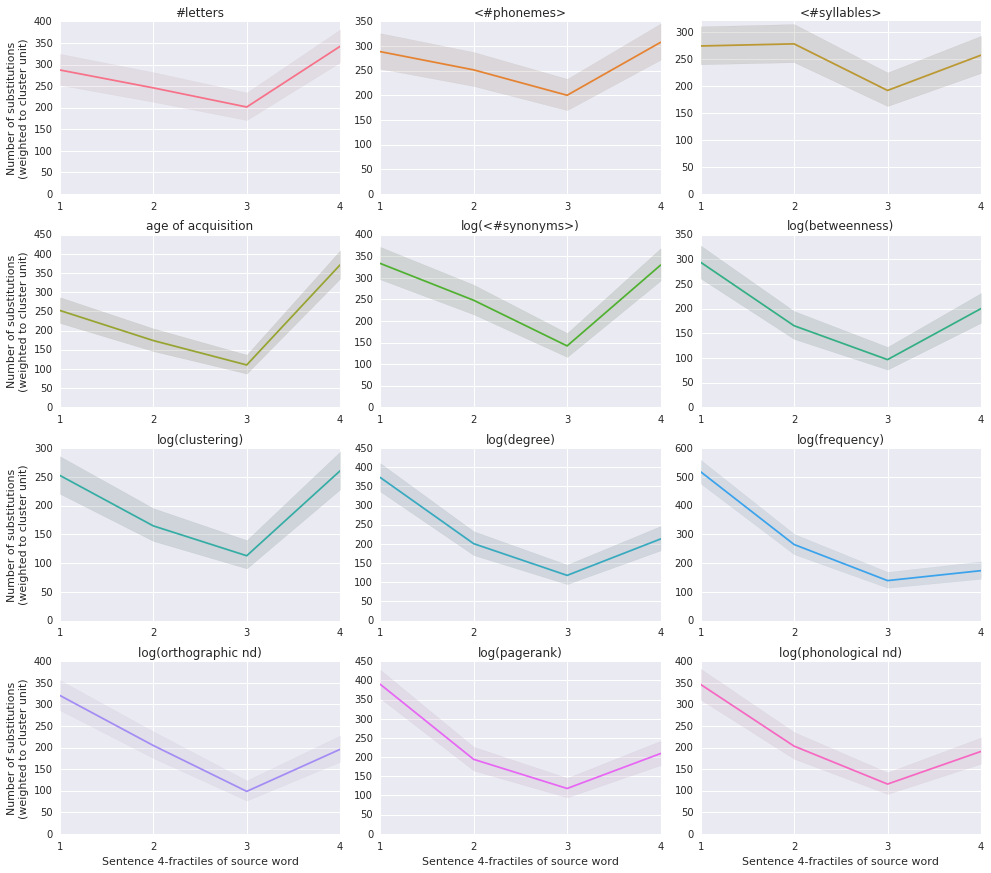

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

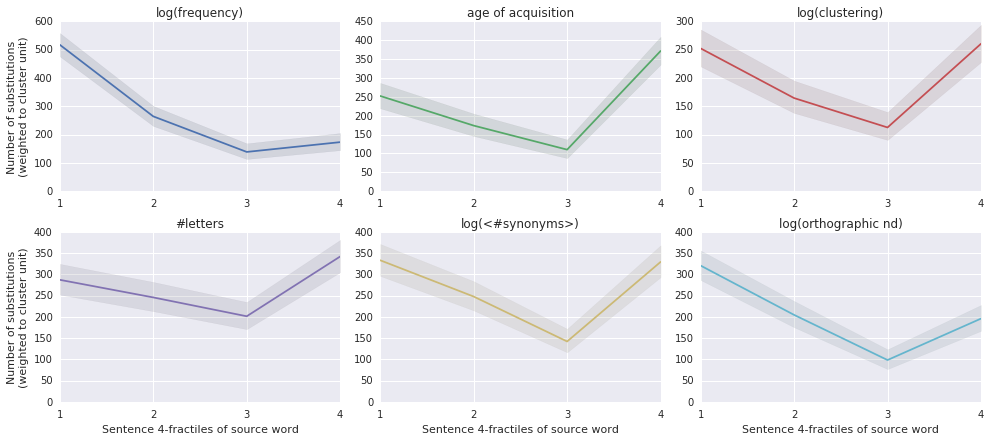

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)